In [1]:
import tensorflow as tf
import math
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data as mnist_data
import matplotlib


hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

print("Tensorflow version " + tf.__version__)
tf.set_random_seed(0)

# Load training and eval data
mnist = mnist_data.read_data_sets("data", one_hot=True, reshape=False, validation_size=0)
features = mnist.train.images
labels = np.asarray(mnist.train.labels, dtype=np.int32)
print (features.shape, labels.shape)
features_test = mnist.test.images  # Returns np.array
labels_test = np.asarray(mnist.test.labels, dtype=np.int32)
print (features_test.shape, labels_test.shape)

# Initialize placeholders
x = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28, 1], name="input")
y = tf.placeholder(dtype=tf.int32, shape=[None, 10], name="label")
dropout_prob = tf.placeholder(dtype=tf.float32, name="dropout_prob")


#The layers of the neural network
conv_1 = tf.layers.conv2d(inputs= x,filters=6, kernel_size=6, padding="SAME",strides=[1,1], activation=tf.nn.relu)
#pool1 = tf.nn.max_pool(conv_1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool1")
conv_2 = tf.layers.conv2d(inputs=conv_1,filters=12, kernel_size=5, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
#pool2 = tf.nn.max_pool(conv_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool2")
conv_3 = tf.layers.conv2d(inputs=conv_2,filters=24, kernel_size=4, padding="SAME",strides=[2, 2], activation=tf.nn.relu)
pool3 = tf.nn.max_pool(conv_3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME", name="pool3")
shape = pool3.get_shape().as_list()
reshaped = tf.reshape(pool3, shape=[-1, shape[1] * shape[2] * shape[3]])
dense1 = tf.contrib.layers.fully_connected(reshaped, 200 ,activation_fn=tf.nn.relu,scope='dense1')
dropout = tf.nn.dropout(dense1,dropout_prob)
logits = tf.contrib.layers.fully_connected(dropout, 10 ,activation_fn=None,scope='dense2')
softmax = tf.nn.softmax(logits, name = "Out")





with tf.name_scope("Loss"):
    # Calcul de la fonction de coût
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,
                                                                     logits=logits, name="cross_entropy"))
    print("loss:", loss)
with tf.name_scope("Train"):
    # La fonction d'optimisation
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        train_op = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

with tf.name_scope("accuracy"):
    # Trouve l'indice de la sortie la plus élevée, donc le label prédit
    pred = tf.argmax(softmax, 1, name="pred")
    true_pred = tf.argmax(y, 1)
    # Calcul le taux de prédiction correct
    correct_prediction = tf.equal(pred, true_pred)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    
    
    
train_loss_results = []
test_loss_result = []
train_accuracy_results = []
test_accuracy_results = []

# Ouverture de la Session TensorFlow
sess = tf.Session()
# Initialisation des variables du modèle
sess.run(tf.global_variables_initializer())

# La boucle d'entrainement
for i in range(10000):
    features, labels = mnist.train.next_batch(100)

    # On appel l'opérateur d'entrainement
    sess.run(train_op, feed_dict={x: features, y: labels, dropout_prob: 0.75})
    # On appel les opérateurs des différentes métriques
    loss_val, accuracy_val = sess.run([loss, accuracy], feed_dict={x: features, y: labels, dropout_prob: 1.0})

    # On récupère le taux de prédiction sur les données test
    test_accuracy_val,test_loss_val = sess.run([accuracy,loss], feed_dict={x: features_test, y: labels_test, dropout_prob: 1.0})

    # On ajoute les valeurs des métrriques de la boucle aux listes
    train_loss_results.append(loss_val*10)
    test_loss_result.append(test_loss_val*10)
    train_accuracy_results.append(accuracy_val)
    test_accuracy_results.append(test_accuracy_val)

    print(" Epoch :", i," Loss: ", loss_val,"Test_Loss: ", test_loss_val)
    print(" Accuracy: ", accuracy_val,"Accuracy Test: ",test_accuracy_val)


Instructions for updating:
Use the retry module or similar alternatives.
b'Hello, TensorFlow!'
Tensorflow version 1.7.0
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)
loss: Tensor("Loss/Mean:0", shape=(), dtype=float32)
 Epoch : 0  Loss:  2.28319 Test_Loss:  2.29429
 Accuracy:  0.17 Accuracy Test:  0.126
 Epo

 Epoch : 62  Loss:  0.255858 Test_Loss:  0.348969
 Accuracy:  0.93 Accuracy Test:  0.9036
 Epoch : 63  Loss:  0.344195 Test_Loss:  0.342635
 Accuracy:  0.88 Accuracy Test:  0.9051
 Epoch : 64  Loss:  0.265028 Test_Loss:  0.334344
 Accuracy:  0.93 Accuracy Test:  0.9081
 Epoch : 65  Loss:  0.301582 Test_Loss:  0.33134
 Accuracy:  0.91 Accuracy Test:  0.909
 Epoch : 66  Loss:  0.533171 Test_Loss:  0.327445
 Accuracy:  0.87 Accuracy Test:  0.9101
 Epoch : 67  Loss:  0.243332 Test_Loss:  0.321325
 Accuracy:  0.94 Accuracy Test:  0.9113
 Epoch : 68  Loss:  0.401573 Test_Loss:  0.315373
 Accuracy:  0.89 Accuracy Test:  0.9129
 Epoch : 69  Loss:  0.324844 Test_Loss:  0.310475
 Accuracy:  0.9 Accuracy Test:  0.9142
 Epoch : 70  Loss:  0.333233 Test_Loss:  0.303014
 Accuracy:  0.92 Accuracy Test:  0.9145
 Epoch : 71  Loss:  0.436873 Test_Loss:  0.299043
 Accuracy:  0.9 Accuracy Test:  0.9155
 Epoch : 72  Loss:  0.348837 Test_Loss:  0.299352
 Accuracy:  0.91 Accuracy Test:  0.9166
 Epoch : 73  L

 Epoch : 153  Loss:  0.208796 Test_Loss:  0.17396
 Accuracy:  0.91 Accuracy Test:  0.9441
 Epoch : 154  Loss:  0.0789016 Test_Loss:  0.172519
 Accuracy:  0.98 Accuracy Test:  0.9457
 Epoch : 155  Loss:  0.22468 Test_Loss:  0.170153
 Accuracy:  0.95 Accuracy Test:  0.9468
 Epoch : 156  Loss:  0.118924 Test_Loss:  0.167411
 Accuracy:  0.96 Accuracy Test:  0.9493
 Epoch : 157  Loss:  0.102195 Test_Loss:  0.1634
 Accuracy:  0.96 Accuracy Test:  0.9501
 Epoch : 158  Loss:  0.167104 Test_Loss:  0.165984
 Accuracy:  0.93 Accuracy Test:  0.9489
 Epoch : 159  Loss:  0.209354 Test_Loss:  0.170946
 Accuracy:  0.95 Accuracy Test:  0.9455
 Epoch : 160  Loss:  0.110713 Test_Loss:  0.178244
 Accuracy:  0.97 Accuracy Test:  0.9445
 Epoch : 161  Loss:  0.164028 Test_Loss:  0.177621
 Accuracy:  0.94 Accuracy Test:  0.9448
 Epoch : 162  Loss:  0.105911 Test_Loss:  0.172971
 Accuracy:  0.96 Accuracy Test:  0.9472
 Epoch : 163  Loss:  0.141635 Test_Loss:  0.167573
 Accuracy:  0.94 Accuracy Test:  0.9488
 E

 Epoch : 244  Loss:  0.0640668 Test_Loss:  0.130224
 Accuracy:  1.0 Accuracy Test:  0.9603
 Epoch : 245  Loss:  0.24839 Test_Loss:  0.127506
 Accuracy:  0.95 Accuracy Test:  0.9615
 Epoch : 246  Loss:  0.143863 Test_Loss:  0.123397
 Accuracy:  0.97 Accuracy Test:  0.9638
 Epoch : 247  Loss:  0.159525 Test_Loss:  0.120678
 Accuracy:  0.97 Accuracy Test:  0.9634
 Epoch : 248  Loss:  0.116829 Test_Loss:  0.119443
 Accuracy:  0.97 Accuracy Test:  0.9634
 Epoch : 249  Loss:  0.16205 Test_Loss:  0.119109
 Accuracy:  0.94 Accuracy Test:  0.9633
 Epoch : 250  Loss:  0.116088 Test_Loss:  0.121608
 Accuracy:  0.97 Accuracy Test:  0.9608
 Epoch : 251  Loss:  0.152199 Test_Loss:  0.125337
 Accuracy:  0.95 Accuracy Test:  0.9595
 Epoch : 252  Loss:  0.201013 Test_Loss:  0.124335
 Accuracy:  0.93 Accuracy Test:  0.961
 Epoch : 253  Loss:  0.131019 Test_Loss:  0.12119
 Accuracy:  0.96 Accuracy Test:  0.9627
 Epoch : 254  Loss:  0.12579 Test_Loss:  0.117765
 Accuracy:  0.97 Accuracy Test:  0.9636
 Epo

 Epoch : 334  Loss:  0.0829291 Test_Loss:  0.115143
 Accuracy:  0.97 Accuracy Test:  0.9632
 Epoch : 335  Loss:  0.170627 Test_Loss:  0.107668
 Accuracy:  0.96 Accuracy Test:  0.965
 Epoch : 336  Loss:  0.0746772 Test_Loss:  0.101847
 Accuracy:  0.98 Accuracy Test:  0.9658
 Epoch : 337  Loss:  0.115136 Test_Loss:  0.0990496
 Accuracy:  0.97 Accuracy Test:  0.9667
 Epoch : 338  Loss:  0.0452029 Test_Loss:  0.103155
 Accuracy:  0.99 Accuracy Test:  0.9664
 Epoch : 339  Loss:  0.300238 Test_Loss:  0.109103
 Accuracy:  0.96 Accuracy Test:  0.9667
 Epoch : 340  Loss:  0.164389 Test_Loss:  0.113626
 Accuracy:  0.94 Accuracy Test:  0.9656
 Epoch : 341  Loss:  0.0687723 Test_Loss:  0.114049
 Accuracy:  0.97 Accuracy Test:  0.9649
 Epoch : 342  Loss:  0.120217 Test_Loss:  0.109519
 Accuracy:  0.96 Accuracy Test:  0.9668
 Epoch : 343  Loss:  0.0720575 Test_Loss:  0.105172
 Accuracy:  0.98 Accuracy Test:  0.9672
 Epoch : 344  Loss:  0.117954 Test_Loss:  0.103524
 Accuracy:  0.96 Accuracy Test:  0

 Epoch : 424  Loss:  0.0407731 Test_Loss:  0.0830994
 Accuracy:  0.99 Accuracy Test:  0.9722
 Epoch : 425  Loss:  0.113958 Test_Loss:  0.083669
 Accuracy:  0.95 Accuracy Test:  0.9721
 Epoch : 426  Loss:  0.0858309 Test_Loss:  0.0853778
 Accuracy:  0.98 Accuracy Test:  0.9712
 Epoch : 427  Loss:  0.0807773 Test_Loss:  0.0870917
 Accuracy:  0.98 Accuracy Test:  0.9702
 Epoch : 428  Loss:  0.142346 Test_Loss:  0.0874889
 Accuracy:  0.96 Accuracy Test:  0.9705
 Epoch : 429  Loss:  0.15163 Test_Loss:  0.0863525
 Accuracy:  0.93 Accuracy Test:  0.9717
 Epoch : 430  Loss:  0.0696963 Test_Loss:  0.0852218
 Accuracy:  0.98 Accuracy Test:  0.9718
 Epoch : 431  Loss:  0.038346 Test_Loss:  0.0850438
 Accuracy:  0.99 Accuracy Test:  0.9716
 Epoch : 432  Loss:  0.05387 Test_Loss:  0.0852249
 Accuracy:  0.99 Accuracy Test:  0.9719
 Epoch : 433  Loss:  0.16646 Test_Loss:  0.0854481
 Accuracy:  0.95 Accuracy Test:  0.9732
 Epoch : 434  Loss:  0.0996133 Test_Loss:  0.0884702
 Accuracy:  0.96 Accuracy T

 Epoch : 513  Loss:  0.0868247 Test_Loss:  0.0895277
 Accuracy:  0.97 Accuracy Test:  0.9735
 Epoch : 514  Loss:  0.12635 Test_Loss:  0.0897233
 Accuracy:  0.98 Accuracy Test:  0.9732
 Epoch : 515  Loss:  0.078805 Test_Loss:  0.0892531
 Accuracy:  0.98 Accuracy Test:  0.9733
 Epoch : 516  Loss:  0.139037 Test_Loss:  0.087249
 Accuracy:  0.93 Accuracy Test:  0.9728
 Epoch : 517  Loss:  0.131528 Test_Loss:  0.0866007
 Accuracy:  0.94 Accuracy Test:  0.9717
 Epoch : 518  Loss:  0.0329488 Test_Loss:  0.0872763
 Accuracy:  1.0 Accuracy Test:  0.9723
 Epoch : 519  Loss:  0.0971206 Test_Loss:  0.0897845
 Accuracy:  0.97 Accuracy Test:  0.9707
 Epoch : 520  Loss:  0.142054 Test_Loss:  0.0923905
 Accuracy:  0.96 Accuracy Test:  0.97
 Epoch : 521  Loss:  0.119488 Test_Loss:  0.0925737
 Accuracy:  0.97 Accuracy Test:  0.97
 Epoch : 522  Loss:  0.088379 Test_Loss:  0.0907686
 Accuracy:  0.98 Accuracy Test:  0.9702
 Epoch : 523  Loss:  0.0965588 Test_Loss:  0.0906284
 Accuracy:  0.97 Accuracy Test:

 Epoch : 602  Loss:  0.105477 Test_Loss:  0.085289
 Accuracy:  0.97 Accuracy Test:  0.972
 Epoch : 603  Loss:  0.111066 Test_Loss:  0.0809096
 Accuracy:  0.94 Accuracy Test:  0.9736
 Epoch : 604  Loss:  0.0745723 Test_Loss:  0.0753467
 Accuracy:  0.97 Accuracy Test:  0.9754
 Epoch : 605  Loss:  0.091647 Test_Loss:  0.0708618
 Accuracy:  0.96 Accuracy Test:  0.9775
 Epoch : 606  Loss:  0.0794697 Test_Loss:  0.0672409
 Accuracy:  0.98 Accuracy Test:  0.978
 Epoch : 607  Loss:  0.0284969 Test_Loss:  0.0653739
 Accuracy:  0.99 Accuracy Test:  0.9783
 Epoch : 608  Loss:  0.0466948 Test_Loss:  0.0646028
 Accuracy:  0.99 Accuracy Test:  0.9788
 Epoch : 609  Loss:  0.0306947 Test_Loss:  0.064498
 Accuracy:  0.98 Accuracy Test:  0.9784
 Epoch : 610  Loss:  0.0462337 Test_Loss:  0.0649031
 Accuracy:  0.99 Accuracy Test:  0.9784
 Epoch : 611  Loss:  0.0801701 Test_Loss:  0.0658568
 Accuracy:  0.96 Accuracy Test:  0.9782
 Epoch : 612  Loss:  0.0550894 Test_Loss:  0.0672758
 Accuracy:  0.99 Accurac

 Epoch : 691  Loss:  0.0707945 Test_Loss:  0.0722913
 Accuracy:  0.98 Accuracy Test:  0.9767
 Epoch : 692  Loss:  0.0853205 Test_Loss:  0.0729358
 Accuracy:  0.96 Accuracy Test:  0.9758
 Epoch : 693  Loss:  0.111007 Test_Loss:  0.0744312
 Accuracy:  0.96 Accuracy Test:  0.9753
 Epoch : 694  Loss:  0.10168 Test_Loss:  0.072901
 Accuracy:  0.97 Accuracy Test:  0.9757
 Epoch : 695  Loss:  0.0463862 Test_Loss:  0.0720571
 Accuracy:  0.99 Accuracy Test:  0.9758
 Epoch : 696  Loss:  0.0632076 Test_Loss:  0.0698225
 Accuracy:  0.98 Accuracy Test:  0.9761
 Epoch : 697  Loss:  0.0305783 Test_Loss:  0.0676759
 Accuracy:  0.99 Accuracy Test:  0.9768
 Epoch : 698  Loss:  0.0403348 Test_Loss:  0.0667261
 Accuracy:  0.98 Accuracy Test:  0.9777
 Epoch : 699  Loss:  0.0748484 Test_Loss:  0.0674161
 Accuracy:  0.97 Accuracy Test:  0.9772
 Epoch : 700  Loss:  0.0644399 Test_Loss:  0.0686449
 Accuracy:  0.97 Accuracy Test:  0.9769
 Epoch : 701  Loss:  0.0448553 Test_Loss:  0.0704221
 Accuracy:  0.99 Accu

 Epoch : 780  Loss:  0.0116878 Test_Loss:  0.0706153
 Accuracy:  1.0 Accuracy Test:  0.9766
 Epoch : 781  Loss:  0.117812 Test_Loss:  0.0711519
 Accuracy:  0.95 Accuracy Test:  0.977
 Epoch : 782  Loss:  0.0287807 Test_Loss:  0.0706409
 Accuracy:  1.0 Accuracy Test:  0.9764
 Epoch : 783  Loss:  0.0688568 Test_Loss:  0.0693373
 Accuracy:  0.99 Accuracy Test:  0.9771
 Epoch : 784  Loss:  0.0888341 Test_Loss:  0.0675104
 Accuracy:  0.98 Accuracy Test:  0.9779
 Epoch : 785  Loss:  0.126297 Test_Loss:  0.0659143
 Accuracy:  0.96 Accuracy Test:  0.9779
 Epoch : 786  Loss:  0.0653221 Test_Loss:  0.0644408
 Accuracy:  0.97 Accuracy Test:  0.9791
 Epoch : 787  Loss:  0.0425659 Test_Loss:  0.0631692
 Accuracy:  0.98 Accuracy Test:  0.9797
 Epoch : 788  Loss:  0.0596709 Test_Loss:  0.0634922
 Accuracy:  0.97 Accuracy Test:  0.9798
 Epoch : 789  Loss:  0.0629343 Test_Loss:  0.0657637
 Accuracy:  0.99 Accuracy Test:  0.9793
 Epoch : 790  Loss:  0.0732727 Test_Loss:  0.066633
 Accuracy:  0.96 Accura

 Epoch : 869  Loss:  0.126134 Test_Loss:  0.0649448
 Accuracy:  0.96 Accuracy Test:  0.9777
 Epoch : 870  Loss:  0.0536243 Test_Loss:  0.0631614
 Accuracy:  0.99 Accuracy Test:  0.9786
 Epoch : 871  Loss:  0.0438945 Test_Loss:  0.0628781
 Accuracy:  0.99 Accuracy Test:  0.9793
 Epoch : 872  Loss:  0.178851 Test_Loss:  0.06192
 Accuracy:  0.95 Accuracy Test:  0.9799
 Epoch : 873  Loss:  0.0483365 Test_Loss:  0.0612158
 Accuracy:  0.99 Accuracy Test:  0.9803
 Epoch : 874  Loss:  0.0275584 Test_Loss:  0.0606045
 Accuracy:  1.0 Accuracy Test:  0.9805
 Epoch : 875  Loss:  0.0327175 Test_Loss:  0.0602279
 Accuracy:  1.0 Accuracy Test:  0.9804
 Epoch : 876  Loss:  0.0380935 Test_Loss:  0.0599034
 Accuracy:  0.99 Accuracy Test:  0.9806
 Epoch : 877  Loss:  0.0568889 Test_Loss:  0.060134
 Accuracy:  0.99 Accuracy Test:  0.9808
 Epoch : 878  Loss:  0.0652899 Test_Loss:  0.0598341
 Accuracy:  0.99 Accuracy Test:  0.9801
 Epoch : 879  Loss:  0.0388842 Test_Loss:  0.0597469
 Accuracy:  0.99 Accurac

 Epoch : 958  Loss:  0.0649064 Test_Loss:  0.0565236
 Accuracy:  0.98 Accuracy Test:  0.9809
 Epoch : 959  Loss:  0.0741629 Test_Loss:  0.0551109
 Accuracy:  0.97 Accuracy Test:  0.9811
 Epoch : 960  Loss:  0.034645 Test_Loss:  0.0539732
 Accuracy:  0.99 Accuracy Test:  0.9816
 Epoch : 961  Loss:  0.0920221 Test_Loss:  0.0541646
 Accuracy:  0.98 Accuracy Test:  0.9812
 Epoch : 962  Loss:  0.0707346 Test_Loss:  0.0549364
 Accuracy:  0.99 Accuracy Test:  0.9816
 Epoch : 963  Loss:  0.0366624 Test_Loss:  0.0563313
 Accuracy:  0.99 Accuracy Test:  0.9813
 Epoch : 964  Loss:  0.0679224 Test_Loss:  0.058057
 Accuracy:  0.97 Accuracy Test:  0.9809
 Epoch : 965  Loss:  0.073836 Test_Loss:  0.0577022
 Accuracy:  0.97 Accuracy Test:  0.9809
 Epoch : 966  Loss:  0.0700008 Test_Loss:  0.0567557
 Accuracy:  0.97 Accuracy Test:  0.9806
 Epoch : 967  Loss:  0.0145671 Test_Loss:  0.0561908
 Accuracy:  1.0 Accuracy Test:  0.9809
 Epoch : 968  Loss:  0.045543 Test_Loss:  0.0558064
 Accuracy:  0.99 Accur

 Epoch : 1047  Loss:  0.0830617 Test_Loss:  0.0520881
 Accuracy:  0.98 Accuracy Test:  0.983
 Epoch : 1048  Loss:  0.0112802 Test_Loss:  0.0525819
 Accuracy:  1.0 Accuracy Test:  0.9826
 Epoch : 1049  Loss:  0.0714646 Test_Loss:  0.0525153
 Accuracy:  0.96 Accuracy Test:  0.9824
 Epoch : 1050  Loss:  0.0598103 Test_Loss:  0.0513461
 Accuracy:  0.98 Accuracy Test:  0.983
 Epoch : 1051  Loss:  0.0557131 Test_Loss:  0.0506904
 Accuracy:  0.97 Accuracy Test:  0.9828
 Epoch : 1052  Loss:  0.0353968 Test_Loss:  0.0501471
 Accuracy:  0.99 Accuracy Test:  0.9833
 Epoch : 1053  Loss:  0.0185453 Test_Loss:  0.050254
 Accuracy:  0.99 Accuracy Test:  0.9828
 Epoch : 1054  Loss:  0.0780502 Test_Loss:  0.050261
 Accuracy:  0.97 Accuracy Test:  0.9831
 Epoch : 1055  Loss:  0.0411657 Test_Loss:  0.0511006
 Accuracy:  0.99 Accuracy Test:  0.9836
 Epoch : 1056  Loss:  0.0405902 Test_Loss:  0.0525781
 Accuracy:  0.98 Accuracy Test:  0.9832
 Epoch : 1057  Loss:  0.0714998 Test_Loss:  0.053322
 Accuracy:  

 Epoch : 1135  Loss:  0.0215235 Test_Loss:  0.0543643
 Accuracy:  0.99 Accuracy Test:  0.9822
 Epoch : 1136  Loss:  0.0723296 Test_Loss:  0.0550136
 Accuracy:  0.97 Accuracy Test:  0.9825
 Epoch : 1137  Loss:  0.0772872 Test_Loss:  0.0559722
 Accuracy:  0.97 Accuracy Test:  0.9825
 Epoch : 1138  Loss:  0.0974057 Test_Loss:  0.0560724
 Accuracy:  0.96 Accuracy Test:  0.9825
 Epoch : 1139  Loss:  0.0433324 Test_Loss:  0.0565307
 Accuracy:  0.99 Accuracy Test:  0.9822
 Epoch : 1140  Loss:  0.0849262 Test_Loss:  0.0561004
 Accuracy:  0.95 Accuracy Test:  0.9825
 Epoch : 1141  Loss:  0.0577036 Test_Loss:  0.055024
 Accuracy:  0.98 Accuracy Test:  0.9835
 Epoch : 1142  Loss:  0.0925819 Test_Loss:  0.0556778
 Accuracy:  0.97 Accuracy Test:  0.983
 Epoch : 1143  Loss:  0.0349919 Test_Loss:  0.0587709
 Accuracy:  0.99 Accuracy Test:  0.9813
 Epoch : 1144  Loss:  0.171815 Test_Loss:  0.0595032
 Accuracy:  0.97 Accuracy Test:  0.981
 Epoch : 1145  Loss:  0.0345328 Test_Loss:  0.0588363
 Accuracy:

 Epoch : 1223  Loss:  0.0637719 Test_Loss:  0.0522559
 Accuracy:  0.98 Accuracy Test:  0.9828
 Epoch : 1224  Loss:  0.141215 Test_Loss:  0.0495814
 Accuracy:  0.97 Accuracy Test:  0.9838
 Epoch : 1225  Loss:  0.00547779 Test_Loss:  0.04791
 Accuracy:  1.0 Accuracy Test:  0.9843
 Epoch : 1226  Loss:  0.0596787 Test_Loss:  0.0466421
 Accuracy:  0.99 Accuracy Test:  0.985
 Epoch : 1227  Loss:  0.0373683 Test_Loss:  0.0463899
 Accuracy:  0.98 Accuracy Test:  0.9846
 Epoch : 1228  Loss:  0.0490685 Test_Loss:  0.0470592
 Accuracy:  0.99 Accuracy Test:  0.9844
 Epoch : 1229  Loss:  0.0263456 Test_Loss:  0.0486958
 Accuracy:  0.99 Accuracy Test:  0.9838
 Epoch : 1230  Loss:  0.054545 Test_Loss:  0.0500608
 Accuracy:  0.98 Accuracy Test:  0.9831
 Epoch : 1231  Loss:  0.0391192 Test_Loss:  0.0519716
 Accuracy:  0.98 Accuracy Test:  0.9828
 Epoch : 1232  Loss:  0.0404481 Test_Loss:  0.0533883
 Accuracy:  0.99 Accuracy Test:  0.9823
 Epoch : 1233  Loss:  0.0566168 Test_Loss:  0.0555577
 Accuracy: 

 Epoch : 1311  Loss:  0.0424953 Test_Loss:  0.0548125
 Accuracy:  0.99 Accuracy Test:  0.9827
 Epoch : 1312  Loss:  0.0232803 Test_Loss:  0.0554969
 Accuracy:  0.99 Accuracy Test:  0.9821
 Epoch : 1313  Loss:  0.0397916 Test_Loss:  0.0557435
 Accuracy:  0.99 Accuracy Test:  0.9824
 Epoch : 1314  Loss:  0.0143005 Test_Loss:  0.0547966
 Accuracy:  1.0 Accuracy Test:  0.9832
 Epoch : 1315  Loss:  0.0278239 Test_Loss:  0.0535396
 Accuracy:  0.99 Accuracy Test:  0.9837
 Epoch : 1316  Loss:  0.0294047 Test_Loss:  0.0523925
 Accuracy:  1.0 Accuracy Test:  0.9839
 Epoch : 1317  Loss:  0.0205134 Test_Loss:  0.0513863
 Accuracy:  0.99 Accuracy Test:  0.9838
 Epoch : 1318  Loss:  0.0484555 Test_Loss:  0.0510549
 Accuracy:  0.98 Accuracy Test:  0.9844
 Epoch : 1319  Loss:  0.00340545 Test_Loss:  0.051801
 Accuracy:  1.0 Accuracy Test:  0.9839
 Epoch : 1320  Loss:  0.037643 Test_Loss:  0.051831
 Accuracy:  0.98 Accuracy Test:  0.9838
 Epoch : 1321  Loss:  0.0406479 Test_Loss:  0.052364
 Accuracy:  

 Epoch : 1399  Loss:  0.0505424 Test_Loss:  0.046336
 Accuracy:  0.99 Accuracy Test:  0.9841
 Epoch : 1400  Loss:  0.0416028 Test_Loss:  0.0468525
 Accuracy:  0.99 Accuracy Test:  0.9843
 Epoch : 1401  Loss:  0.0101955 Test_Loss:  0.0475912
 Accuracy:  1.0 Accuracy Test:  0.9843
 Epoch : 1402  Loss:  0.0163777 Test_Loss:  0.0481579
 Accuracy:  0.99 Accuracy Test:  0.9846
 Epoch : 1403  Loss:  0.0647769 Test_Loss:  0.0481199
 Accuracy:  0.98 Accuracy Test:  0.9847
 Epoch : 1404  Loss:  0.0350013 Test_Loss:  0.047595
 Accuracy:  0.99 Accuracy Test:  0.9848
 Epoch : 1405  Loss:  0.0490683 Test_Loss:  0.0467346
 Accuracy:  0.99 Accuracy Test:  0.9855
 Epoch : 1406  Loss:  0.0951515 Test_Loss:  0.0461171
 Accuracy:  0.98 Accuracy Test:  0.9855
 Epoch : 1407  Loss:  0.0394635 Test_Loss:  0.0459196
 Accuracy:  0.98 Accuracy Test:  0.9853
 Epoch : 1408  Loss:  0.133544 Test_Loss:  0.0463858
 Accuracy:  0.97 Accuracy Test:  0.9842
 Epoch : 1409  Loss:  0.0875558 Test_Loss:  0.0486557
 Accuracy:

 Epoch : 1487  Loss:  0.0232895 Test_Loss:  0.0475255
 Accuracy:  0.99 Accuracy Test:  0.9841
 Epoch : 1488  Loss:  0.0325714 Test_Loss:  0.0486834
 Accuracy:  0.98 Accuracy Test:  0.9842
 Epoch : 1489  Loss:  0.0380512 Test_Loss:  0.0501897
 Accuracy:  0.98 Accuracy Test:  0.9845
 Epoch : 1490  Loss:  0.0170019 Test_Loss:  0.0513578
 Accuracy:  1.0 Accuracy Test:  0.9845
 Epoch : 1491  Loss:  0.068749 Test_Loss:  0.0524438
 Accuracy:  0.97 Accuracy Test:  0.984
 Epoch : 1492  Loss:  0.0548506 Test_Loss:  0.0508151
 Accuracy:  0.99 Accuracy Test:  0.9844
 Epoch : 1493  Loss:  0.0354524 Test_Loss:  0.0499502
 Accuracy:  0.99 Accuracy Test:  0.985
 Epoch : 1494  Loss:  0.0498237 Test_Loss:  0.0491778
 Accuracy:  0.99 Accuracy Test:  0.9849
 Epoch : 1495  Loss:  0.0365461 Test_Loss:  0.0487782
 Accuracy:  0.99 Accuracy Test:  0.9849
 Epoch : 1496  Loss:  0.0611097 Test_Loss:  0.0501252
 Accuracy:  0.99 Accuracy Test:  0.9842
 Epoch : 1497  Loss:  0.0322268 Test_Loss:  0.0532946
 Accuracy:

 Epoch : 1575  Loss:  0.0378827 Test_Loss:  0.0380295
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 1576  Loss:  0.0281286 Test_Loss:  0.0378976
 Accuracy:  0.99 Accuracy Test:  0.988
 Epoch : 1577  Loss:  0.0474671 Test_Loss:  0.0378482
 Accuracy:  0.99 Accuracy Test:  0.9879
 Epoch : 1578  Loss:  0.0291533 Test_Loss:  0.0381697
 Accuracy:  0.99 Accuracy Test:  0.9878
 Epoch : 1579  Loss:  0.00438873 Test_Loss:  0.0387562
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 1580  Loss:  0.042017 Test_Loss:  0.0394964
 Accuracy:  0.99 Accuracy Test:  0.987
 Epoch : 1581  Loss:  0.0137564 Test_Loss:  0.0403493
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 1582  Loss:  0.0272884 Test_Loss:  0.0408863
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 1583  Loss:  0.00785111 Test_Loss:  0.0416752
 Accuracy:  1.0 Accuracy Test:  0.9861
 Epoch : 1584  Loss:  0.0392186 Test_Loss:  0.0422941
 Accuracy:  0.99 Accuracy Test:  0.9861
 Epoch : 1585  Loss:  0.0299767 Test_Loss:  0.0427373
 Accuracy:

 Epoch : 1663  Loss:  0.0225676 Test_Loss:  0.044799
 Accuracy:  1.0 Accuracy Test:  0.9852
 Epoch : 1664  Loss:  0.0654794 Test_Loss:  0.0446312
 Accuracy:  0.99 Accuracy Test:  0.9853
 Epoch : 1665  Loss:  0.0150767 Test_Loss:  0.0445515
 Accuracy:  1.0 Accuracy Test:  0.985
 Epoch : 1666  Loss:  0.0461149 Test_Loss:  0.044513
 Accuracy:  0.97 Accuracy Test:  0.9851
 Epoch : 1667  Loss:  0.0111268 Test_Loss:  0.0446491
 Accuracy:  1.0 Accuracy Test:  0.9845
 Epoch : 1668  Loss:  0.0487811 Test_Loss:  0.0455364
 Accuracy:  0.98 Accuracy Test:  0.9839
 Epoch : 1669  Loss:  0.0200563 Test_Loss:  0.0470704
 Accuracy:  0.99 Accuracy Test:  0.9833
 Epoch : 1670  Loss:  0.0190124 Test_Loss:  0.0483121
 Accuracy:  0.99 Accuracy Test:  0.9826
 Epoch : 1671  Loss:  0.0608629 Test_Loss:  0.0473825
 Accuracy:  0.97 Accuracy Test:  0.9831
 Epoch : 1672  Loss:  0.0353892 Test_Loss:  0.0477226
 Accuracy:  0.99 Accuracy Test:  0.9837
 Epoch : 1673  Loss:  0.0152411 Test_Loss:  0.0482279
 Accuracy:  

 Epoch : 1751  Loss:  0.058591 Test_Loss:  0.0390121
 Accuracy:  0.97 Accuracy Test:  0.9855
 Epoch : 1752  Loss:  0.0211845 Test_Loss:  0.0401573
 Accuracy:  0.99 Accuracy Test:  0.9849
 Epoch : 1753  Loss:  0.0158413 Test_Loss:  0.041485
 Accuracy:  1.0 Accuracy Test:  0.9846
 Epoch : 1754  Loss:  0.00979586 Test_Loss:  0.0432008
 Accuracy:  1.0 Accuracy Test:  0.984
 Epoch : 1755  Loss:  0.0631693 Test_Loss:  0.04436
 Accuracy:  0.98 Accuracy Test:  0.9837
 Epoch : 1756  Loss:  0.0694306 Test_Loss:  0.0451251
 Accuracy:  0.97 Accuracy Test:  0.9839
 Epoch : 1757  Loss:  0.0673985 Test_Loss:  0.0450699
 Accuracy:  0.98 Accuracy Test:  0.9848
 Epoch : 1758  Loss:  0.0456446 Test_Loss:  0.0450005
 Accuracy:  0.99 Accuracy Test:  0.9844
 Epoch : 1759  Loss:  0.0628718 Test_Loss:  0.0446841
 Accuracy:  0.98 Accuracy Test:  0.9849
 Epoch : 1760  Loss:  0.0732913 Test_Loss:  0.0439791
 Accuracy:  0.96 Accuracy Test:  0.9847
 Epoch : 1761  Loss:  0.0598602 Test_Loss:  0.0433795
 Accuracy:  

 Epoch : 1839  Loss:  0.0725209 Test_Loss:  0.0436356
 Accuracy:  0.97 Accuracy Test:  0.9848
 Epoch : 1840  Loss:  0.0147833 Test_Loss:  0.0426444
 Accuracy:  1.0 Accuracy Test:  0.9846
 Epoch : 1841  Loss:  0.0129052 Test_Loss:  0.0419325
 Accuracy:  1.0 Accuracy Test:  0.9851
 Epoch : 1842  Loss:  0.0137839 Test_Loss:  0.0413456
 Accuracy:  1.0 Accuracy Test:  0.9851
 Epoch : 1843  Loss:  0.0619084 Test_Loss:  0.0404706
 Accuracy:  0.96 Accuracy Test:  0.9857
 Epoch : 1844  Loss:  0.0298183 Test_Loss:  0.0404874
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 1845  Loss:  0.0898291 Test_Loss:  0.040618
 Accuracy:  0.97 Accuracy Test:  0.9858
 Epoch : 1846  Loss:  0.0189861 Test_Loss:  0.0409468
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 1847  Loss:  0.0373575 Test_Loss:  0.0413897
 Accuracy:  0.99 Accuracy Test:  0.9864
 Epoch : 1848  Loss:  0.0115213 Test_Loss:  0.0416509
 Accuracy:  1.0 Accuracy Test:  0.986
 Epoch : 1849  Loss:  0.069789 Test_Loss:  0.0407035
 Accuracy:  0.9

 Epoch : 1927  Loss:  0.0759766 Test_Loss:  0.042659
 Accuracy:  0.99 Accuracy Test:  0.985
 Epoch : 1928  Loss:  0.0198186 Test_Loss:  0.0418821
 Accuracy:  1.0 Accuracy Test:  0.9859
 Epoch : 1929  Loss:  0.0172069 Test_Loss:  0.0418588
 Accuracy:  1.0 Accuracy Test:  0.986
 Epoch : 1930  Loss:  0.0443445 Test_Loss:  0.0423837
 Accuracy:  0.98 Accuracy Test:  0.9857
 Epoch : 1931  Loss:  0.0313475 Test_Loss:  0.042827
 Accuracy:  0.98 Accuracy Test:  0.9854
 Epoch : 1932  Loss:  0.0653045 Test_Loss:  0.0424354
 Accuracy:  0.98 Accuracy Test:  0.9855
 Epoch : 1933  Loss:  0.0125549 Test_Loss:  0.042523
 Accuracy:  0.99 Accuracy Test:  0.9854
 Epoch : 1934  Loss:  0.033173 Test_Loss:  0.0425429
 Accuracy:  0.99 Accuracy Test:  0.9857
 Epoch : 1935  Loss:  0.0171109 Test_Loss:  0.0427602
 Accuracy:  0.99 Accuracy Test:  0.9855
 Epoch : 1936  Loss:  0.0173234 Test_Loss:  0.0427628
 Accuracy:  1.0 Accuracy Test:  0.9858
 Epoch : 1937  Loss:  0.0108033 Test_Loss:  0.0428941
 Accuracy:  0.9

 Epoch : 2015  Loss:  0.0255759 Test_Loss:  0.0397588
 Accuracy:  0.99 Accuracy Test:  0.9857
 Epoch : 2016  Loss:  0.0390937 Test_Loss:  0.0381923
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 2017  Loss:  0.0411221 Test_Loss:  0.0373135
 Accuracy:  0.98 Accuracy Test:  0.9866
 Epoch : 2018  Loss:  0.0140345 Test_Loss:  0.0367464
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 2019  Loss:  0.0136316 Test_Loss:  0.0364459
 Accuracy:  1.0 Accuracy Test:  0.9873
 Epoch : 2020  Loss:  0.0174652 Test_Loss:  0.0364858
 Accuracy:  0.99 Accuracy Test:  0.9878
 Epoch : 2021  Loss:  0.0332983 Test_Loss:  0.036763
 Accuracy:  0.99 Accuracy Test:  0.9875
 Epoch : 2022  Loss:  0.0772205 Test_Loss:  0.037311
 Accuracy:  0.99 Accuracy Test:  0.9872
 Epoch : 2023  Loss:  0.0801805 Test_Loss:  0.0386195
 Accuracy:  0.96 Accuracy Test:  0.9863
 Epoch : 2024  Loss:  0.0382332 Test_Loss:  0.0399637
 Accuracy:  0.99 Accuracy Test:  0.9864
 Epoch : 2025  Loss:  0.0691474 Test_Loss:  0.0414117
 Accuracy: 

 Epoch : 2103  Loss:  0.0209432 Test_Loss:  0.038374
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 2104  Loss:  0.0567221 Test_Loss:  0.038729
 Accuracy:  0.98 Accuracy Test:  0.9876
 Epoch : 2105  Loss:  0.0380315 Test_Loss:  0.0394394
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 2106  Loss:  0.00642231 Test_Loss:  0.0402763
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 2107  Loss:  0.0393293 Test_Loss:  0.0407326
 Accuracy:  0.99 Accuracy Test:  0.9869
 Epoch : 2108  Loss:  0.00714943 Test_Loss:  0.0409885
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 2109  Loss:  0.0269601 Test_Loss:  0.0407787
 Accuracy:  0.99 Accuracy Test:  0.9867
 Epoch : 2110  Loss:  0.103867 Test_Loss:  0.0401305
 Accuracy:  0.97 Accuracy Test:  0.9871
 Epoch : 2111  Loss:  0.0236575 Test_Loss:  0.0394987
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 2112  Loss:  0.0396246 Test_Loss:  0.0393035
 Accuracy:  0.99 Accuracy Test:  0.9865
 Epoch : 2113  Loss:  0.0170778 Test_Loss:  0.0396111
 Accuracy:

 Epoch : 2191  Loss:  0.0938843 Test_Loss:  0.040914
 Accuracy:  0.99 Accuracy Test:  0.9858
 Epoch : 2192  Loss:  0.0196133 Test_Loss:  0.0413974
 Accuracy:  1.0 Accuracy Test:  0.9855
 Epoch : 2193  Loss:  0.0318441 Test_Loss:  0.0418755
 Accuracy:  0.98 Accuracy Test:  0.9853
 Epoch : 2194  Loss:  0.0710009 Test_Loss:  0.0423383
 Accuracy:  0.98 Accuracy Test:  0.9848
 Epoch : 2195  Loss:  0.0143165 Test_Loss:  0.0428822
 Accuracy:  1.0 Accuracy Test:  0.9843
 Epoch : 2196  Loss:  0.0277 Test_Loss:  0.0435165
 Accuracy:  0.99 Accuracy Test:  0.9842
 Epoch : 2197  Loss:  0.00916443 Test_Loss:  0.0439245
 Accuracy:  1.0 Accuracy Test:  0.9842
 Epoch : 2198  Loss:  0.0284157 Test_Loss:  0.0438617
 Accuracy:  0.99 Accuracy Test:  0.9846
 Epoch : 2199  Loss:  0.0974801 Test_Loss:  0.0434892
 Accuracy:  0.98 Accuracy Test:  0.9847
 Epoch : 2200  Loss:  0.00981058 Test_Loss:  0.0434089
 Accuracy:  0.99 Accuracy Test:  0.9848
 Epoch : 2201  Loss:  0.0378915 Test_Loss:  0.0429759
 Accuracy: 

 Epoch : 2279  Loss:  0.0145788 Test_Loss:  0.0379566
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 2280  Loss:  0.0338577 Test_Loss:  0.0380269
 Accuracy:  0.99 Accuracy Test:  0.988
 Epoch : 2281  Loss:  0.00719653 Test_Loss:  0.0381576
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 2282  Loss:  0.0145438 Test_Loss:  0.0383747
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 2283  Loss:  0.0412093 Test_Loss:  0.0380644
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 2284  Loss:  0.055016 Test_Loss:  0.0378201
 Accuracy:  0.99 Accuracy Test:  0.9876
 Epoch : 2285  Loss:  0.0317903 Test_Loss:  0.0371079
 Accuracy:  0.99 Accuracy Test:  0.9878
 Epoch : 2286  Loss:  0.0509672 Test_Loss:  0.0367044
 Accuracy:  0.98 Accuracy Test:  0.9875
 Epoch : 2287  Loss:  0.00772671 Test_Loss:  0.0366979
 Accuracy:  1.0 Accuracy Test:  0.9876
 Epoch : 2288  Loss:  0.0115802 Test_Loss:  0.0366286
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 2289  Loss:  0.0511706 Test_Loss:  0.0371734
 Accuracy: 

 Epoch : 2367  Loss:  0.0266422 Test_Loss:  0.0350101
 Accuracy:  0.99 Accuracy Test:  0.9871
 Epoch : 2368  Loss:  0.013756 Test_Loss:  0.0365674
 Accuracy:  1.0 Accuracy Test:  0.9866
 Epoch : 2369  Loss:  0.0370018 Test_Loss:  0.0381181
 Accuracy:  0.98 Accuracy Test:  0.9861
 Epoch : 2370  Loss:  0.0995763 Test_Loss:  0.0392062
 Accuracy:  0.99 Accuracy Test:  0.9857
 Epoch : 2371  Loss:  0.0140739 Test_Loss:  0.0397383
 Accuracy:  0.99 Accuracy Test:  0.9856
 Epoch : 2372  Loss:  0.0464282 Test_Loss:  0.0395612
 Accuracy:  0.98 Accuracy Test:  0.9859
 Epoch : 2373  Loss:  0.0226103 Test_Loss:  0.0391346
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 2374  Loss:  0.00926067 Test_Loss:  0.0387049
 Accuracy:  1.0 Accuracy Test:  0.9863
 Epoch : 2375  Loss:  0.00581188 Test_Loss:  0.0383939
 Accuracy:  1.0 Accuracy Test:  0.9869
 Epoch : 2376  Loss:  0.0345014 Test_Loss:  0.0380404
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 2377  Loss:  0.0152465 Test_Loss:  0.0378245
 Accuracy

 Epoch : 2455  Loss:  0.0146127 Test_Loss:  0.0345525
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 2456  Loss:  0.016775 Test_Loss:  0.0343155
 Accuracy:  0.99 Accuracy Test:  0.9893
 Epoch : 2457  Loss:  0.00670311 Test_Loss:  0.0344616
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 2458  Loss:  0.0221633 Test_Loss:  0.0343776
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 2459  Loss:  0.00667695 Test_Loss:  0.0342223
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 2460  Loss:  0.0205835 Test_Loss:  0.0338605
 Accuracy:  0.99 Accuracy Test:  0.9893
 Epoch : 2461  Loss:  0.0459262 Test_Loss:  0.0340724
 Accuracy:  0.97 Accuracy Test:  0.9887
 Epoch : 2462  Loss:  0.022276 Test_Loss:  0.0345993
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 2463  Loss:  0.0910406 Test_Loss:  0.0347098
 Accuracy:  0.98 Accuracy Test:  0.989
 Epoch : 2464  Loss:  0.0201678 Test_Loss:  0.0339859
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 2465  Loss:  0.0199756 Test_Loss:  0.0337258
 Accuracy:  

 Epoch : 2543  Loss:  0.00501735 Test_Loss:  0.0354907
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 2544  Loss:  0.0232934 Test_Loss:  0.0356443
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 2545  Loss:  0.0338327 Test_Loss:  0.0357656
 Accuracy:  0.98 Accuracy Test:  0.9875
 Epoch : 2546  Loss:  0.00795293 Test_Loss:  0.0362241
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2547  Loss:  0.0149954 Test_Loss:  0.0358857
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2548  Loss:  0.00123007 Test_Loss:  0.0358322
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 2549  Loss:  0.00441431 Test_Loss:  0.0353147
 Accuracy:  1.0 Accuracy Test:  0.9871
 Epoch : 2550  Loss:  0.10328 Test_Loss:  0.034393
 Accuracy:  0.98 Accuracy Test:  0.9877
 Epoch : 2551  Loss:  0.0782219 Test_Loss:  0.0339385
 Accuracy:  0.98 Accuracy Test:  0.988
 Epoch : 2552  Loss:  0.00858266 Test_Loss:  0.0335781
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 2553  Loss:  0.0290878 Test_Loss:  0.0329178
 Accuracy:  

 Epoch : 2631  Loss:  0.00640448 Test_Loss:  0.0328871
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 2632  Loss:  0.00893284 Test_Loss:  0.0333372
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 2633  Loss:  0.0168689 Test_Loss:  0.0339006
 Accuracy:  0.99 Accuracy Test:  0.9891
 Epoch : 2634  Loss:  0.010864 Test_Loss:  0.0349955
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 2635  Loss:  0.103577 Test_Loss:  0.0362154
 Accuracy:  0.98 Accuracy Test:  0.9878
 Epoch : 2636  Loss:  0.00835606 Test_Loss:  0.0373532
 Accuracy:  1.0 Accuracy Test:  0.9874
 Epoch : 2637  Loss:  0.00367032 Test_Loss:  0.0386035
 Accuracy:  1.0 Accuracy Test:  0.9868
 Epoch : 2638  Loss:  0.025168 Test_Loss:  0.0390632
 Accuracy:  0.99 Accuracy Test:  0.9868
 Epoch : 2639  Loss:  0.102344 Test_Loss:  0.0377239
 Accuracy:  0.97 Accuracy Test:  0.9872
 Epoch : 2640  Loss:  0.00503713 Test_Loss:  0.0352431
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 2641  Loss:  0.0180084 Test_Loss:  0.0333161
 Accuracy: 

 Epoch : 2719  Loss:  0.00458948 Test_Loss:  0.0419206
 Accuracy:  1.0 Accuracy Test:  0.9851
 Epoch : 2720  Loss:  0.0168794 Test_Loss:  0.0431449
 Accuracy:  0.99 Accuracy Test:  0.9844
 Epoch : 2721  Loss:  0.0129825 Test_Loss:  0.0438504
 Accuracy:  1.0 Accuracy Test:  0.9842
 Epoch : 2722  Loss:  0.0824468 Test_Loss:  0.044219
 Accuracy:  0.97 Accuracy Test:  0.9843
 Epoch : 2723  Loss:  0.0183678 Test_Loss:  0.0446882
 Accuracy:  1.0 Accuracy Test:  0.9843
 Epoch : 2724  Loss:  0.0160117 Test_Loss:  0.0451582
 Accuracy:  1.0 Accuracy Test:  0.9841
 Epoch : 2725  Loss:  0.0828296 Test_Loss:  0.0433966
 Accuracy:  0.97 Accuracy Test:  0.9851
 Epoch : 2726  Loss:  0.00840077 Test_Loss:  0.0415522
 Accuracy:  1.0 Accuracy Test:  0.9855
 Epoch : 2727  Loss:  0.0385312 Test_Loss:  0.0397814
 Accuracy:  0.98 Accuracy Test:  0.9858
 Epoch : 2728  Loss:  0.0115278 Test_Loss:  0.0385877
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 2729  Loss:  0.058859 Test_Loss:  0.0371058
 Accuracy:  

 Epoch : 2807  Loss:  0.0148718 Test_Loss:  0.0324051
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 2808  Loss:  0.0658069 Test_Loss:  0.0333258
 Accuracy:  0.98 Accuracy Test:  0.9895
 Epoch : 2809  Loss:  0.0455093 Test_Loss:  0.0329624
 Accuracy:  0.98 Accuracy Test:  0.9895
 Epoch : 2810  Loss:  0.0130932 Test_Loss:  0.0322995
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 2811  Loss:  0.0675626 Test_Loss:  0.0324327
 Accuracy:  0.98 Accuracy Test:  0.9894
 Epoch : 2812  Loss:  0.0309238 Test_Loss:  0.0318191
 Accuracy:  0.98 Accuracy Test:  0.9895
 Epoch : 2813  Loss:  0.032631 Test_Loss:  0.0304797
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 2814  Loss:  0.0066178 Test_Loss:  0.0297358
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 2815  Loss:  0.0100283 Test_Loss:  0.0292641
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 2816  Loss:  0.0229366 Test_Loss:  0.0291623
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 2817  Loss:  0.0921354 Test_Loss:  0.0292557
 Accuracy:

 Epoch : 2895  Loss:  0.00859887 Test_Loss:  0.03329
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 2896  Loss:  0.0253294 Test_Loss:  0.0334859
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2897  Loss:  0.00455615 Test_Loss:  0.0337718
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 2898  Loss:  0.00331714 Test_Loss:  0.0343599
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 2899  Loss:  0.0154907 Test_Loss:  0.0347852
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 2900  Loss:  0.00748424 Test_Loss:  0.0350755
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 2901  Loss:  0.0337919 Test_Loss:  0.0353715
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 2902  Loss:  0.0996519 Test_Loss:  0.0357881
 Accuracy:  0.97 Accuracy Test:  0.9891
 Epoch : 2903  Loss:  0.0410671 Test_Loss:  0.0360707
 Accuracy:  0.98 Accuracy Test:  0.9888
 Epoch : 2904  Loss:  0.0514865 Test_Loss:  0.0362145
 Accuracy:  0.97 Accuracy Test:  0.9885
 Epoch : 2905  Loss:  0.0505533 Test_Loss:  0.0366417
 Accuracy

 Epoch : 2983  Loss:  0.0150914 Test_Loss:  0.0383641
 Accuracy:  1.0 Accuracy Test:  0.9878
 Epoch : 2984  Loss:  0.0348873 Test_Loss:  0.0420457
 Accuracy:  0.99 Accuracy Test:  0.9868
 Epoch : 2985  Loss:  0.0140395 Test_Loss:  0.0463232
 Accuracy:  1.0 Accuracy Test:  0.9856
 Epoch : 2986  Loss:  0.120894 Test_Loss:  0.049727
 Accuracy:  0.98 Accuracy Test:  0.9846
 Epoch : 2987  Loss:  0.039175 Test_Loss:  0.0527242
 Accuracy:  0.98 Accuracy Test:  0.9837
 Epoch : 2988  Loss:  0.023902 Test_Loss:  0.0554271
 Accuracy:  0.99 Accuracy Test:  0.9828
 Epoch : 2989  Loss:  0.0420453 Test_Loss:  0.0531654
 Accuracy:  0.98 Accuracy Test:  0.9838
 Epoch : 2990  Loss:  0.291172 Test_Loss:  0.045707
 Accuracy:  0.95 Accuracy Test:  0.9854
 Epoch : 2991  Loss:  0.0277763 Test_Loss:  0.0403522
 Accuracy:  1.0 Accuracy Test:  0.9875
 Epoch : 2992  Loss:  0.0069266 Test_Loss:  0.036943
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 2993  Loss:  0.00765238 Test_Loss:  0.0348325
 Accuracy:  1.0 

 Epoch : 3071  Loss:  0.00860978 Test_Loss:  0.0408591
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 3072  Loss:  0.022914 Test_Loss:  0.0406329
 Accuracy:  0.99 Accuracy Test:  0.9873
 Epoch : 3073  Loss:  0.0591142 Test_Loss:  0.0395038
 Accuracy:  0.98 Accuracy Test:  0.9876
 Epoch : 3074  Loss:  0.00954745 Test_Loss:  0.0386666
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 3075  Loss:  0.0359667 Test_Loss:  0.0376723
 Accuracy:  0.99 Accuracy Test:  0.9883
 Epoch : 3076  Loss:  0.0425773 Test_Loss:  0.0369301
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 3077  Loss:  0.0070799 Test_Loss:  0.036351
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3078  Loss:  0.0208889 Test_Loss:  0.0358356
 Accuracy:  0.98 Accuracy Test:  0.9883
 Epoch : 3079  Loss:  0.00778723 Test_Loss:  0.0350847
 Accuracy:  1.0 Accuracy Test:  0.9884
 Epoch : 3080  Loss:  0.005985 Test_Loss:  0.0348717
 Accuracy:  1.0 Accuracy Test:  0.9885
 Epoch : 3081  Loss:  0.0351841 Test_Loss:  0.0348896
 Accuracy:  

 Epoch : 3159  Loss:  0.0413378 Test_Loss:  0.0315185
 Accuracy:  0.98 Accuracy Test:  0.9894
 Epoch : 3160  Loss:  0.0119819 Test_Loss:  0.0304246
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 3161  Loss:  0.0124506 Test_Loss:  0.029949
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 3162  Loss:  0.00838764 Test_Loss:  0.0299182
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3163  Loss:  0.0707 Test_Loss:  0.0305402
 Accuracy:  0.98 Accuracy Test:  0.9897
 Epoch : 3164  Loss:  0.00334726 Test_Loss:  0.0316508
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3165  Loss:  0.00934613 Test_Loss:  0.0333219
 Accuracy:  1.0 Accuracy Test:  0.9887
 Epoch : 3166  Loss:  0.00910234 Test_Loss:  0.0349194
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 3167  Loss:  0.0565243 Test_Loss:  0.0363133
 Accuracy:  0.98 Accuracy Test:  0.9878
 Epoch : 3168  Loss:  0.0182481 Test_Loss:  0.037484
 Accuracy:  0.99 Accuracy Test:  0.9875
 Epoch : 3169  Loss:  0.0535085 Test_Loss:  0.0370374
 Accuracy:  

 Epoch : 3247  Loss:  0.0635735 Test_Loss:  0.0351423
 Accuracy:  0.98 Accuracy Test:  0.9877
 Epoch : 3248  Loss:  0.0469886 Test_Loss:  0.0340102
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 3249  Loss:  0.0284696 Test_Loss:  0.0332013
 Accuracy:  0.99 Accuracy Test:  0.9883
 Epoch : 3250  Loss:  0.00869648 Test_Loss:  0.0328834
 Accuracy:  1.0 Accuracy Test:  0.9881
 Epoch : 3251  Loss:  0.00678319 Test_Loss:  0.0334548
 Accuracy:  1.0 Accuracy Test:  0.9872
 Epoch : 3252  Loss:  0.027297 Test_Loss:  0.0346726
 Accuracy:  1.0 Accuracy Test:  0.987
 Epoch : 3253  Loss:  0.0290376 Test_Loss:  0.0366169
 Accuracy:  0.99 Accuracy Test:  0.9866
 Epoch : 3254  Loss:  0.0108825 Test_Loss:  0.0384429
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 3255  Loss:  0.028175 Test_Loss:  0.0389933
 Accuracy:  0.99 Accuracy Test:  0.9858
 Epoch : 3256  Loss:  0.00699779 Test_Loss:  0.0387157
 Accuracy:  1.0 Accuracy Test:  0.9862
 Epoch : 3257  Loss:  0.030831 Test_Loss:  0.0376746
 Accuracy:  

 Epoch : 3335  Loss:  0.0106143 Test_Loss:  0.0339874
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 3336  Loss:  0.0246299 Test_Loss:  0.0327284
 Accuracy:  0.99 Accuracy Test:  0.9884
 Epoch : 3337  Loss:  0.049985 Test_Loss:  0.0318704
 Accuracy:  0.99 Accuracy Test:  0.9887
 Epoch : 3338  Loss:  0.00718632 Test_Loss:  0.0312877
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 3339  Loss:  0.00833336 Test_Loss:  0.030999
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3340  Loss:  0.0104802 Test_Loss:  0.030749
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3341  Loss:  0.00629778 Test_Loss:  0.0304624
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3342  Loss:  0.0194934 Test_Loss:  0.0303486
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3343  Loss:  0.008153 Test_Loss:  0.0304121
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 3344  Loss:  0.00483775 Test_Loss:  0.0306872
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3345  Loss:  0.0387739 Test_Loss:  0.0308315
 Accuracy:  0.

 Epoch : 3423  Loss:  0.0190757 Test_Loss:  0.0312851
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 3424  Loss:  0.0141816 Test_Loss:  0.0305643
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 3425  Loss:  0.0121936 Test_Loss:  0.030018
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 3426  Loss:  0.0075891 Test_Loss:  0.0298407
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 3427  Loss:  0.0227196 Test_Loss:  0.029977
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 3428  Loss:  0.0188171 Test_Loss:  0.0303137
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 3429  Loss:  0.021929 Test_Loss:  0.030657
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3430  Loss:  0.0143575 Test_Loss:  0.0311732
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3431  Loss:  0.0289864 Test_Loss:  0.031754
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 3432  Loss:  0.00781468 Test_Loss:  0.0324927
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3433  Loss:  0.0426322 Test_Loss:  0.0325186
 Accuracy:  0.98 A

 Epoch : 3511  Loss:  0.0337835 Test_Loss:  0.033044
 Accuracy:  0.98 Accuracy Test:  0.9899
 Epoch : 3512  Loss:  0.0295729 Test_Loss:  0.0337952
 Accuracy:  0.98 Accuracy Test:  0.9899
 Epoch : 3513  Loss:  0.0427121 Test_Loss:  0.0346905
 Accuracy:  0.98 Accuracy Test:  0.9894
 Epoch : 3514  Loss:  0.0080744 Test_Loss:  0.0356864
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 3515  Loss:  0.0563283 Test_Loss:  0.0366807
 Accuracy:  0.98 Accuracy Test:  0.9884
 Epoch : 3516  Loss:  0.0205558 Test_Loss:  0.0375976
 Accuracy:  1.0 Accuracy Test:  0.988
 Epoch : 3517  Loss:  0.0515461 Test_Loss:  0.0380192
 Accuracy:  0.97 Accuracy Test:  0.9879
 Epoch : 3518  Loss:  0.01177 Test_Loss:  0.0383717
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 3519  Loss:  0.0296945 Test_Loss:  0.0371849
 Accuracy:  0.98 Accuracy Test:  0.9888
 Epoch : 3520  Loss:  0.00587433 Test_Loss:  0.0362352
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 3521  Loss:  0.0065484 Test_Loss:  0.0358968
 Accuracy:  1

 Epoch : 3599  Loss:  0.202283 Test_Loss:  0.0364904
 Accuracy:  0.97 Accuracy Test:  0.9886
 Epoch : 3600  Loss:  0.018266 Test_Loss:  0.0354593
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 3601  Loss:  0.0167198 Test_Loss:  0.0345034
 Accuracy:  0.99 Accuracy Test:  0.9888
 Epoch : 3602  Loss:  0.00723888 Test_Loss:  0.0334852
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 3603  Loss:  0.0513827 Test_Loss:  0.0326617
 Accuracy:  0.98 Accuracy Test:  0.9894
 Epoch : 3604  Loss:  0.00673944 Test_Loss:  0.0318284
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 3605  Loss:  0.0036924 Test_Loss:  0.0312283
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3606  Loss:  0.0144547 Test_Loss:  0.0306721
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3607  Loss:  0.00823953 Test_Loss:  0.0303883
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3608  Loss:  0.0120772 Test_Loss:  0.0298944
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3609  Loss:  0.0082461 Test_Loss:  0.0297464
 Accuracy:  1

 Epoch : 3687  Loss:  0.0146494 Test_Loss:  0.0277785
 Accuracy:  0.99 Accuracy Test:  0.9915
 Epoch : 3688  Loss:  0.0175537 Test_Loss:  0.0274596
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 3689  Loss:  0.00317313 Test_Loss:  0.0274286
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 3690  Loss:  0.00345715 Test_Loss:  0.0276029
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 3691  Loss:  0.0603901 Test_Loss:  0.0274998
 Accuracy:  0.99 Accuracy Test:  0.9918
 Epoch : 3692  Loss:  0.0101467 Test_Loss:  0.0277418
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 3693  Loss:  0.0262459 Test_Loss:  0.0280785
 Accuracy:  0.98 Accuracy Test:  0.991
 Epoch : 3694  Loss:  0.00308449 Test_Loss:  0.0289967
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 3695  Loss:  0.0113048 Test_Loss:  0.0300639
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 3696  Loss:  0.00390204 Test_Loss:  0.0312717
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 3697  Loss:  0.00621584 Test_Loss:  0.0325639
 Accuracy

 Epoch : 3775  Loss:  0.037038 Test_Loss:  0.029448
 Accuracy:  0.98 Accuracy Test:  0.9909
 Epoch : 3776  Loss:  0.024901 Test_Loss:  0.0299211
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 3777  Loss:  0.00313597 Test_Loss:  0.030414
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 3778  Loss:  0.0151469 Test_Loss:  0.0307471
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 3779  Loss:  0.0182803 Test_Loss:  0.0311604
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3780  Loss:  0.00386994 Test_Loss:  0.0316559
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 3781  Loss:  0.00319471 Test_Loss:  0.0321889
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 3782  Loss:  0.00852231 Test_Loss:  0.0330234
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 3783  Loss:  0.0192304 Test_Loss:  0.0340668
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 3784  Loss:  0.00972166 Test_Loss:  0.0343358
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 3785  Loss:  0.00389642 Test_Loss:  0.0345845
 Accuracy:  1

 Epoch : 3863  Loss:  0.00241805 Test_Loss:  0.028127
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 3864  Loss:  0.0563179 Test_Loss:  0.0277605
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 3865  Loss:  0.00547763 Test_Loss:  0.0276456
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 3866  Loss:  0.0100895 Test_Loss:  0.0277395
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 3867  Loss:  0.00083373 Test_Loss:  0.028015
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 3868  Loss:  0.00341561 Test_Loss:  0.0284666
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 3869  Loss:  0.00403073 Test_Loss:  0.0290732
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3870  Loss:  0.13545 Test_Loss:  0.0289231
 Accuracy:  0.97 Accuracy Test:  0.9902
 Epoch : 3871  Loss:  0.0459903 Test_Loss:  0.0286556
 Accuracy:  0.97 Accuracy Test:  0.9904
 Epoch : 3872  Loss:  0.0161346 Test_Loss:  0.0284886
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 3873  Loss:  0.0103221 Test_Loss:  0.0284664
 Accuracy:  

 Epoch : 3951  Loss:  0.0152949 Test_Loss:  0.0326899
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 3952  Loss:  0.00901934 Test_Loss:  0.0328619
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3953  Loss:  0.0456436 Test_Loss:  0.0318968
 Accuracy:  0.98 Accuracy Test:  0.9897
 Epoch : 3954  Loss:  0.0025614 Test_Loss:  0.0314029
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 3955  Loss:  0.0105853 Test_Loss:  0.0313564
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 3956  Loss:  0.00219055 Test_Loss:  0.0314551
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 3957  Loss:  0.0273052 Test_Loss:  0.0308703
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 3958  Loss:  0.00275478 Test_Loss:  0.0304089
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 3959  Loss:  0.00318658 Test_Loss:  0.030114
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 3960  Loss:  0.0841631 Test_Loss:  0.0298715
 Accuracy:  0.99 Accuracy Test:  0.9903
 Epoch : 3961  Loss:  0.0201924 Test_Loss:  0.0296857
 Accuracy:  0

 Epoch : 4039  Loss:  0.00537915 Test_Loss:  0.0284859
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4040  Loss:  0.0148777 Test_Loss:  0.0284765
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4041  Loss:  0.0277918 Test_Loss:  0.0286557
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 4042  Loss:  0.00389458 Test_Loss:  0.0289599
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4043  Loss:  0.0360822 Test_Loss:  0.0293008
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4044  Loss:  0.0310169 Test_Loss:  0.0298513
 Accuracy:  0.98 Accuracy Test:  0.9899
 Epoch : 4045  Loss:  0.0139321 Test_Loss:  0.0304341
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 4046  Loss:  0.0346669 Test_Loss:  0.0305032
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4047  Loss:  0.00879937 Test_Loss:  0.0307256
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4048  Loss:  0.0104275 Test_Loss:  0.0306909
 Accuracy:  0.99 Accuracy Test:  0.9889
 Epoch : 4049  Loss:  0.0110026 Test_Loss:  0.0304188
 Accuracy

 Epoch : 4127  Loss:  0.036298 Test_Loss:  0.0305915
 Accuracy:  0.98 Accuracy Test:  0.9899
 Epoch : 4128  Loss:  0.04579 Test_Loss:  0.0303054
 Accuracy:  0.98 Accuracy Test:  0.99
 Epoch : 4129  Loss:  0.00675072 Test_Loss:  0.0307416
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 4130  Loss:  0.0684657 Test_Loss:  0.0331285
 Accuracy:  0.95 Accuracy Test:  0.9892
 Epoch : 4131  Loss:  0.0250549 Test_Loss:  0.0361648
 Accuracy:  0.99 Accuracy Test:  0.9874
 Epoch : 4132  Loss:  0.0368443 Test_Loss:  0.0382831
 Accuracy:  0.98 Accuracy Test:  0.9868
 Epoch : 4133  Loss:  0.0390556 Test_Loss:  0.0396235
 Accuracy:  0.98 Accuracy Test:  0.9863
 Epoch : 4134  Loss:  0.0210292 Test_Loss:  0.0403021
 Accuracy:  0.99 Accuracy Test:  0.986
 Epoch : 4135  Loss:  0.00683314 Test_Loss:  0.0410581
 Accuracy:  1.0 Accuracy Test:  0.9856
 Epoch : 4136  Loss:  0.0258731 Test_Loss:  0.0389262
 Accuracy:  0.98 Accuracy Test:  0.9864
 Epoch : 4137  Loss:  0.0357178 Test_Loss:  0.0352405
 Accuracy:  

 Epoch : 4215  Loss:  0.00386505 Test_Loss:  0.0328922
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 4216  Loss:  0.00540591 Test_Loss:  0.0336914
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 4217  Loss:  0.0151619 Test_Loss:  0.0344217
 Accuracy:  0.99 Accuracy Test:  0.9891
 Epoch : 4218  Loss:  0.00923797 Test_Loss:  0.0346984
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 4219  Loss:  0.00775506 Test_Loss:  0.0350014
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 4220  Loss:  0.0112781 Test_Loss:  0.0350935
 Accuracy:  0.99 Accuracy Test:  0.9891
 Epoch : 4221  Loss:  0.0133585 Test_Loss:  0.0347287
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 4222  Loss:  0.032104 Test_Loss:  0.0341916
 Accuracy:  0.98 Accuracy Test:  0.9897
 Epoch : 4223  Loss:  0.00562186 Test_Loss:  0.0340194
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4224  Loss:  0.00821828 Test_Loss:  0.0333109
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 4225  Loss:  0.0175166 Test_Loss:  0.0329327
 Accuracy

 Epoch : 4303  Loss:  0.0350959 Test_Loss:  0.0307514
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 4304  Loss:  0.0113777 Test_Loss:  0.0300501
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4305  Loss:  0.018153 Test_Loss:  0.0295826
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 4306  Loss:  0.0121104 Test_Loss:  0.0289048
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4307  Loss:  0.0347936 Test_Loss:  0.0286795
 Accuracy:  0.99 Accuracy Test:  0.9906
 Epoch : 4308  Loss:  0.00200661 Test_Loss:  0.0286199
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 4309  Loss:  0.0154187 Test_Loss:  0.0286836
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 4310  Loss:  0.00604379 Test_Loss:  0.0287533
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 4311  Loss:  0.0363737 Test_Loss:  0.0280454
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 4312  Loss:  0.00322863 Test_Loss:  0.0275922
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 4313  Loss:  0.00116917 Test_Loss:  0.0272444
 Accuracy:  

 Epoch : 4391  Loss:  0.0157226 Test_Loss:  0.0312486
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 4392  Loss:  0.0130555 Test_Loss:  0.0317735
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 4393  Loss:  0.0217795 Test_Loss:  0.0322968
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 4394  Loss:  0.01911 Test_Loss:  0.0320257
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 4395  Loss:  0.00569138 Test_Loss:  0.031874
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 4396  Loss:  0.0598798 Test_Loss:  0.0315196
 Accuracy:  0.98 Accuracy Test:  0.9896
 Epoch : 4397  Loss:  0.0175047 Test_Loss:  0.0309188
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 4398  Loss:  0.00235546 Test_Loss:  0.0306715
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4399  Loss:  0.0316481 Test_Loss:  0.0297485
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 4400  Loss:  0.00244197 Test_Loss:  0.0288549
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 4401  Loss:  0.00217469 Test_Loss:  0.0283007
 Accuracy:  

 Epoch : 4479  Loss:  0.001164 Test_Loss:  0.0261998
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 4480  Loss:  0.0182943 Test_Loss:  0.026052
 Accuracy:  0.98 Accuracy Test:  0.9913
 Epoch : 4481  Loss:  0.00981728 Test_Loss:  0.0260005
 Accuracy:  0.99 Accuracy Test:  0.9912
 Epoch : 4482  Loss:  0.0216428 Test_Loss:  0.0258858
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 4483  Loss:  0.00929472 Test_Loss:  0.025891
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4484  Loss:  0.0252813 Test_Loss:  0.0261557
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 4485  Loss:  0.00159696 Test_Loss:  0.0265779
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4486  Loss:  0.00516796 Test_Loss:  0.0265658
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 4487  Loss:  0.0129126 Test_Loss:  0.0268944
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4488  Loss:  0.0492536 Test_Loss:  0.0268731
 Accuracy:  0.98 Accuracy Test:  0.9902
 Epoch : 4489  Loss:  0.016096 Test_Loss:  0.0268601
 Accuracy:

 Epoch : 4567  Loss:  0.0471949 Test_Loss:  0.0326893
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 4568  Loss:  0.0809395 Test_Loss:  0.0327003
 Accuracy:  0.99 Accuracy Test:  0.9903
 Epoch : 4569  Loss:  0.0138926 Test_Loss:  0.0329257
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4570  Loss:  0.0109488 Test_Loss:  0.0330414
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 4571  Loss:  0.0122644 Test_Loss:  0.0330531
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 4572  Loss:  0.0100199 Test_Loss:  0.0328797
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 4573  Loss:  0.0131649 Test_Loss:  0.0325336
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 4574  Loss:  0.0025633 Test_Loss:  0.0321606
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 4575  Loss:  0.00445703 Test_Loss:  0.0316195
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4576  Loss:  0.00333195 Test_Loss:  0.0313012
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 4577  Loss:  0.00554456 Test_Loss:  0.0310883
 Accuracy:  1

 Epoch : 4655  Loss:  0.00333344 Test_Loss:  0.0277811
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 4656  Loss:  0.0363969 Test_Loss:  0.0285074
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 4657  Loss:  0.00648352 Test_Loss:  0.0294618
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 4658  Loss:  0.005049 Test_Loss:  0.0305212
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 4659  Loss:  0.0570196 Test_Loss:  0.0306102
 Accuracy:  0.96 Accuracy Test:  0.9904
 Epoch : 4660  Loss:  0.0154355 Test_Loss:  0.030788
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 4661  Loss:  0.0214277 Test_Loss:  0.03028
 Accuracy:  0.99 Accuracy Test:  0.9911
 Epoch : 4662  Loss:  0.0105521 Test_Loss:  0.0300173
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 4663  Loss:  0.00211645 Test_Loss:  0.0299015
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4664  Loss:  0.00662481 Test_Loss:  0.0295932
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 4665  Loss:  0.0449622 Test_Loss:  0.0288906
 Accuracy: 

 Epoch : 4743  Loss:  0.027733 Test_Loss:  0.03123
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 4744  Loss:  0.0244269 Test_Loss:  0.0319853
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 4745  Loss:  0.0108737 Test_Loss:  0.0326015
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 4746  Loss:  0.0159037 Test_Loss:  0.03356
 Accuracy:  0.99 Accuracy Test:  0.9892
 Epoch : 4747  Loss:  0.0162682 Test_Loss:  0.0340873
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 4748  Loss:  0.0205744 Test_Loss:  0.0339081
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 4749  Loss:  0.014641 Test_Loss:  0.0329107
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4750  Loss:  0.0180227 Test_Loss:  0.0321863
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4751  Loss:  0.00370806 Test_Loss:  0.0320024
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 4752  Loss:  0.0383399 Test_Loss:  0.0319358
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 4753  Loss:  0.00438276 Test_Loss:  0.0322696
 Accuracy:  1

 Epoch : 4831  Loss:  0.0062566 Test_Loss:  0.0306278
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 4832  Loss:  0.03169 Test_Loss:  0.0308766
 Accuracy:  0.98 Accuracy Test:  0.9903
 Epoch : 4833  Loss:  0.05319 Test_Loss:  0.0308506
 Accuracy:  0.98 Accuracy Test:  0.9905
 Epoch : 4834  Loss:  0.00803913 Test_Loss:  0.030714
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4835  Loss:  0.00087182 Test_Loss:  0.0306459
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4836  Loss:  0.0158097 Test_Loss:  0.0301222
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 4837  Loss:  0.00045522 Test_Loss:  0.0296788
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 4838  Loss:  0.00713871 Test_Loss:  0.0289985
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 4839  Loss:  0.00574967 Test_Loss:  0.0284028
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 4840  Loss:  0.00314531 Test_Loss:  0.0279399
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 4841  Loss:  0.00157516 Test_Loss:  0.0276016
 Accuracy: 

 Epoch : 4919  Loss:  0.000989209 Test_Loss:  0.0291264
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 4920  Loss:  0.00927003 Test_Loss:  0.0298899
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4921  Loss:  0.0183853 Test_Loss:  0.0307115
 Accuracy:  0.99 Accuracy Test:  0.9902
 Epoch : 4922  Loss:  0.0394909 Test_Loss:  0.0317368
 Accuracy:  0.98 Accuracy Test:  0.9891
 Epoch : 4923  Loss:  0.0036544 Test_Loss:  0.0326618
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 4924  Loss:  0.0192948 Test_Loss:  0.0332356
 Accuracy:  0.99 Accuracy Test:  0.9886
 Epoch : 4925  Loss:  0.0234061 Test_Loss:  0.0320971
 Accuracy:  0.99 Accuracy Test:  0.9892
 Epoch : 4926  Loss:  0.157895 Test_Loss:  0.0301727
 Accuracy:  0.98 Accuracy Test:  0.9901
 Epoch : 4927  Loss:  0.0130881 Test_Loss:  0.0291614
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 4928  Loss:  0.00451059 Test_Loss:  0.0276547
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 4929  Loss:  0.00968897 Test_Loss:  0.0267817
 Accur

 Epoch : 5007  Loss:  0.00324696 Test_Loss:  0.0293672
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 5008  Loss:  0.00254455 Test_Loss:  0.0299587
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 5009  Loss:  0.00403232 Test_Loss:  0.0306048
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 5010  Loss:  0.0182419 Test_Loss:  0.0311641
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5011  Loss:  0.00737015 Test_Loss:  0.0318393
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 5012  Loss:  0.0145193 Test_Loss:  0.0319792
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 5013  Loss:  0.0236834 Test_Loss:  0.0317817
 Accuracy:  0.98 Accuracy Test:  0.9893
 Epoch : 5014  Loss:  0.0307744 Test_Loss:  0.0309578
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 5015  Loss:  0.00220933 Test_Loss:  0.0302998
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5016  Loss:  0.00747872 Test_Loss:  0.0294414
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5017  Loss:  0.0115225 Test_Loss:  0.0290264
 Accuracy:

 Epoch : 5095  Loss:  0.0385683 Test_Loss:  0.0242035
 Accuracy:  0.99 Accuracy Test:  0.9927
 Epoch : 5096  Loss:  0.00865329 Test_Loss:  0.023967
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 5097  Loss:  0.0621586 Test_Loss:  0.0240124
 Accuracy:  0.98 Accuracy Test:  0.9929
 Epoch : 5098  Loss:  0.00253666 Test_Loss:  0.0244381
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 5099  Loss:  0.00487227 Test_Loss:  0.0249909
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 5100  Loss:  0.00235365 Test_Loss:  0.0256799
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 5101  Loss:  0.00210417 Test_Loss:  0.0264394
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 5102  Loss:  0.0261678 Test_Loss:  0.0268065
 Accuracy:  0.99 Accuracy Test:  0.9919
 Epoch : 5103  Loss:  0.0144213 Test_Loss:  0.0265473
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 5104  Loss:  0.0515562 Test_Loss:  0.0264949
 Accuracy:  0.98 Accuracy Test:  0.9921
 Epoch : 5105  Loss:  0.00234444 Test_Loss:  0.0264051
 Accura

 Epoch : 5183  Loss:  0.0032513 Test_Loss:  0.0291122
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 5184  Loss:  0.000260946 Test_Loss:  0.0291521
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5185  Loss:  0.00130738 Test_Loss:  0.0292564
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5186  Loss:  0.00134714 Test_Loss:  0.0293925
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5187  Loss:  0.00875896 Test_Loss:  0.0294518
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5188  Loss:  0.00526014 Test_Loss:  0.0295918
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 5189  Loss:  0.00127429 Test_Loss:  0.0297514
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5190  Loss:  0.0240214 Test_Loss:  0.0296445
 Accuracy:  0.98 Accuracy Test:  0.9898
 Epoch : 5191  Loss:  0.0355698 Test_Loss:  0.0295191
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 5192  Loss:  0.00988171 Test_Loss:  0.0293679
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 5193  Loss:  0.0375742 Test_Loss:  0.0289571
 Accur

 Epoch : 5271  Loss:  0.00342888 Test_Loss:  0.034929
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 5272  Loss:  0.00715747 Test_Loss:  0.0340093
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 5273  Loss:  0.0508611 Test_Loss:  0.0330848
 Accuracy:  0.97 Accuracy Test:  0.9894
 Epoch : 5274  Loss:  0.00138264 Test_Loss:  0.0326636
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 5275  Loss:  0.0122623 Test_Loss:  0.0323125
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 5276  Loss:  0.00426523 Test_Loss:  0.0321611
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5277  Loss:  0.00735271 Test_Loss:  0.0323154
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 5278  Loss:  0.034913 Test_Loss:  0.0326376
 Accuracy:  0.98 Accuracy Test:  0.9894
 Epoch : 5279  Loss:  0.00372534 Test_Loss:  0.0331948
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5280  Loss:  0.021419 Test_Loss:  0.0328501
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 5281  Loss:  0.00430541 Test_Loss:  0.0322142
 Accuracy

 Epoch : 5359  Loss:  0.013576 Test_Loss:  0.0322544
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 5360  Loss:  0.0191126 Test_Loss:  0.0329258
 Accuracy:  0.99 Accuracy Test:  0.9882
 Epoch : 5361  Loss:  0.0110509 Test_Loss:  0.0330965
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 5362  Loss:  0.024184 Test_Loss:  0.0326603
 Accuracy:  0.99 Accuracy Test:  0.9885
 Epoch : 5363  Loss:  0.00222993 Test_Loss:  0.0322108
 Accuracy:  1.0 Accuracy Test:  0.9886
 Epoch : 5364  Loss:  0.0113155 Test_Loss:  0.0313927
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5365  Loss:  0.00358249 Test_Loss:  0.0308311
 Accuracy:  1.0 Accuracy Test:  0.9882
 Epoch : 5366  Loss:  0.0137565 Test_Loss:  0.0292136
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 5367  Loss:  0.00377577 Test_Loss:  0.0285281
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 5368  Loss:  0.0161897 Test_Loss:  0.0283551
 Accuracy:  0.99 Accuracy Test:  0.9894
 Epoch : 5369  Loss:  0.0528352 Test_Loss:  0.0291329
 Accuracy:  

 Epoch : 5447  Loss:  0.00202221 Test_Loss:  0.027113
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 5448  Loss:  0.00220056 Test_Loss:  0.0270408
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 5449  Loss:  0.0165256 Test_Loss:  0.0261136
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 5450  Loss:  0.00153949 Test_Loss:  0.0256255
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 5451  Loss:  0.0112932 Test_Loss:  0.0255202
 Accuracy:  0.99 Accuracy Test:  0.991
 Epoch : 5452  Loss:  0.00220752 Test_Loss:  0.0255455
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 5453  Loss:  0.00586114 Test_Loss:  0.0258753
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 5454  Loss:  0.00603748 Test_Loss:  0.0264881
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 5455  Loss:  0.00207568 Test_Loss:  0.0272294
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 5456  Loss:  0.000332987 Test_Loss:  0.0280747
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 5457  Loss:  0.00932913 Test_Loss:  0.0287032
 Accuracy

 Epoch : 5535  Loss:  0.0213927 Test_Loss:  0.030345
 Accuracy:  0.99 Accuracy Test:  0.9906
 Epoch : 5536  Loss:  0.00354664 Test_Loss:  0.0306173
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5537  Loss:  0.00881969 Test_Loss:  0.0308697
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5538  Loss:  0.00430337 Test_Loss:  0.0311813
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5539  Loss:  0.00721114 Test_Loss:  0.0308443
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5540  Loss:  0.00207163 Test_Loss:  0.0305905
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 5541  Loss:  0.0298136 Test_Loss:  0.029966
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 5542  Loss:  0.00567326 Test_Loss:  0.0296198
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5543  Loss:  0.00420625 Test_Loss:  0.0294409
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5544  Loss:  0.0215287 Test_Loss:  0.0282129
 Accuracy:  0.99 Accuracy Test:  0.9906
 Epoch : 5545  Loss:  0.00218204 Test_Loss:  0.0274271
 Accura

 Epoch : 5623  Loss:  0.0160337 Test_Loss:  0.0310371
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 5624  Loss:  0.00891928 Test_Loss:  0.0302666
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 5625  Loss:  0.00357343 Test_Loss:  0.0297889
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 5626  Loss:  0.00790412 Test_Loss:  0.0292198
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 5627  Loss:  0.00280261 Test_Loss:  0.0292311
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 5628  Loss:  0.0425696 Test_Loss:  0.0293421
 Accuracy:  0.98 Accuracy Test:  0.9912
 Epoch : 5629  Loss:  0.0134139 Test_Loss:  0.0294979
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 5630  Loss:  0.00285935 Test_Loss:  0.0294845
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 5631  Loss:  0.0194677 Test_Loss:  0.0297268
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 5632  Loss:  0.0309222 Test_Loss:  0.0300743
 Accuracy:  0.98 Accuracy Test:  0.9913
 Epoch : 5633  Loss:  0.0441619 Test_Loss:  0.0309093
 Accur

 Epoch : 5711  Loss:  0.0131149 Test_Loss:  0.0305648
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5712  Loss:  0.00335425 Test_Loss:  0.0304001
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 5713  Loss:  0.00196642 Test_Loss:  0.0302145
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 5714  Loss:  0.000723006 Test_Loss:  0.0301425
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5715  Loss:  0.000590019 Test_Loss:  0.0301763
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5716  Loss:  0.00312601 Test_Loss:  0.0300239
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 5717  Loss:  0.00553551 Test_Loss:  0.0299028
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 5718  Loss:  0.00270724 Test_Loss:  0.0298643
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5719  Loss:  0.0132783 Test_Loss:  0.0295246
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 5720  Loss:  0.0107199 Test_Loss:  0.0291262
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 5721  Loss:  0.00867703 Test_Loss:  0.0287324
 Accuracy: 

 Epoch : 5799  Loss:  0.00223189 Test_Loss:  0.0270481
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 5800  Loss:  0.0089268 Test_Loss:  0.0273405
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 5801  Loss:  0.0114224 Test_Loss:  0.0268763
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 5802  Loss:  0.0104139 Test_Loss:  0.0264265
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 5803  Loss:  0.000879231 Test_Loss:  0.0262886
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 5804  Loss:  0.00437807 Test_Loss:  0.0263829
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 5805  Loss:  0.000632822 Test_Loss:  0.0266739
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 5806  Loss:  0.00950174 Test_Loss:  0.02718
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 5807  Loss:  0.00240997 Test_Loss:  0.0278807
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 5808  Loss:  0.0101052 Test_Loss:  0.0285207
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 5809  Loss:  0.0130962 Test_Loss:  0.0289181
 Accuracy: 

 Epoch : 5887  Loss:  0.0173685 Test_Loss:  0.0261979
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 5888  Loss:  0.00328242 Test_Loss:  0.026262
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 5889  Loss:  0.00364915 Test_Loss:  0.0262397
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 5890  Loss:  0.00373389 Test_Loss:  0.0263022
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 5891  Loss:  0.0127217 Test_Loss:  0.0264297
 Accuracy:  0.99 Accuracy Test:  0.9915
 Epoch : 5892  Loss:  0.0211044 Test_Loss:  0.0267787
 Accuracy:  0.99 Accuracy Test:  0.9914
 Epoch : 5893  Loss:  0.0655927 Test_Loss:  0.027127
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 5894  Loss:  0.00481989 Test_Loss:  0.0278846
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 5895  Loss:  0.0133616 Test_Loss:  0.028807
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 5896  Loss:  0.00250932 Test_Loss:  0.029933
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5897  Loss:  0.000506953 Test_Loss:  0.031284
 Accuracy: 

 Epoch : 5975  Loss:  0.0107978 Test_Loss:  0.0296898
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 5976  Loss:  0.00420492 Test_Loss:  0.0299661
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 5977  Loss:  0.00453241 Test_Loss:  0.0301337
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 5978  Loss:  0.0166794 Test_Loss:  0.0302807
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 5979  Loss:  0.00560019 Test_Loss:  0.0304674
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5980  Loss:  0.00112854 Test_Loss:  0.0306744
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 5981  Loss:  0.00314452 Test_Loss:  0.0309184
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 5982  Loss:  0.00142321 Test_Loss:  0.0311508
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 5983  Loss:  0.00162993 Test_Loss:  0.0313917
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 5984  Loss:  0.00806289 Test_Loss:  0.0315704
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 5985  Loss:  0.00404995 Test_Loss:  0.0315064
 Accur

 Epoch : 6063  Loss:  0.0363422 Test_Loss:  0.026656
 Accuracy:  0.99 Accuracy Test:  0.9918
 Epoch : 6064  Loss:  0.00312312 Test_Loss:  0.0255027
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 6065  Loss:  0.0144608 Test_Loss:  0.0248575
 Accuracy:  0.99 Accuracy Test:  0.9922
 Epoch : 6066  Loss:  0.0101247 Test_Loss:  0.024498
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 6067  Loss:  0.0106739 Test_Loss:  0.0243673
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 6068  Loss:  0.00631966 Test_Loss:  0.0245296
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 6069  Loss:  0.00408653 Test_Loss:  0.0251297
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 6070  Loss:  0.0148333 Test_Loss:  0.0252301
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 6071  Loss:  0.0153502 Test_Loss:  0.0252161
 Accuracy:  0.99 Accuracy Test:  0.9918
 Epoch : 6072  Loss:  0.00206838 Test_Loss:  0.0252407
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 6073  Loss:  0.00280994 Test_Loss:  0.0254725
 Accuracy:

 Epoch : 6151  Loss:  0.0299252 Test_Loss:  0.0287966
 Accuracy:  0.98 Accuracy Test:  0.9917
 Epoch : 6152  Loss:  0.00348513 Test_Loss:  0.0279903
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 6153  Loss:  0.0010329 Test_Loss:  0.0274481
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 6154  Loss:  0.0133607 Test_Loss:  0.0269082
 Accuracy:  0.99 Accuracy Test:  0.9923
 Epoch : 6155  Loss:  0.00319625 Test_Loss:  0.0265576
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 6156  Loss:  0.00120992 Test_Loss:  0.0265204
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 6157  Loss:  0.00097698 Test_Loss:  0.0268128
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 6158  Loss:  0.00170491 Test_Loss:  0.0273534
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 6159  Loss:  0.00185139 Test_Loss:  0.0281458
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6160  Loss:  0.0166818 Test_Loss:  0.0290632
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 6161  Loss:  0.0038436 Test_Loss:  0.0302642
 Accura

 Epoch : 6239  Loss:  0.00559726 Test_Loss:  0.0304312
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6240  Loss:  0.000817732 Test_Loss:  0.0302286
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6241  Loss:  0.00984855 Test_Loss:  0.0299022
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 6242  Loss:  0.00327586 Test_Loss:  0.0294658
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 6243  Loss:  0.00105327 Test_Loss:  0.0292605
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 6244  Loss:  0.00930678 Test_Loss:  0.0288667
 Accuracy:  0.99 Accuracy Test:  0.9912
 Epoch : 6245  Loss:  0.00516474 Test_Loss:  0.0286093
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6246  Loss:  0.00452953 Test_Loss:  0.0284234
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6247  Loss:  0.0429947 Test_Loss:  0.028449
 Accuracy:  0.97 Accuracy Test:  0.9913
 Epoch : 6248  Loss:  0.00209162 Test_Loss:  0.0285474
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 6249  Loss:  0.0002656 Test_Loss:  0.0286869
 Acc

 Epoch : 6327  Loss:  0.0258487 Test_Loss:  0.0311742
 Accuracy:  0.99 Accuracy Test:  0.9903
 Epoch : 6328  Loss:  0.00835592 Test_Loss:  0.0326863
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6329  Loss:  0.0115569 Test_Loss:  0.0333222
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 6330  Loss:  0.000800595 Test_Loss:  0.0340079
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6331  Loss:  0.101705 Test_Loss:  0.0337157
 Accuracy:  0.98 Accuracy Test:  0.99
 Epoch : 6332  Loss:  0.00434021 Test_Loss:  0.0331239
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6333  Loss:  0.024805 Test_Loss:  0.0323325
 Accuracy:  0.98 Accuracy Test:  0.9905
 Epoch : 6334  Loss:  0.00321491 Test_Loss:  0.0316314
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 6335  Loss:  0.00480756 Test_Loss:  0.0313673
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6336  Loss:  9.67995e-05 Test_Loss:  0.0314108
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6337  Loss:  0.0174368 Test_Loss:  0.0314028
 Accuracy:  

 Epoch : 6415  Loss:  0.0275142 Test_Loss:  0.0262035
 Accuracy:  0.98 Accuracy Test:  0.9914
 Epoch : 6416  Loss:  0.0032881 Test_Loss:  0.0258786
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6417  Loss:  0.0100234 Test_Loss:  0.0256977
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6418  Loss:  0.00193846 Test_Loss:  0.0257638
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6419  Loss:  0.00114763 Test_Loss:  0.0258778
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6420  Loss:  0.058146 Test_Loss:  0.0260815
 Accuracy:  0.98 Accuracy Test:  0.9917
 Epoch : 6421  Loss:  0.0423834 Test_Loss:  0.0269914
 Accuracy:  0.99 Accuracy Test:  0.9914
 Epoch : 6422  Loss:  0.0179901 Test_Loss:  0.0278722
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6423  Loss:  0.0115671 Test_Loss:  0.0290298
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6424  Loss:  0.00215027 Test_Loss:  0.0302992
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6425  Loss:  0.00462545 Test_Loss:  0.0313811
 Accuracy:

 Epoch : 6503  Loss:  0.000384207 Test_Loss:  0.0285723
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 6504  Loss:  0.00555417 Test_Loss:  0.0286592
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6505  Loss:  0.0302043 Test_Loss:  0.0289071
 Accuracy:  0.99 Accuracy Test:  0.9917
 Epoch : 6506  Loss:  0.00211879 Test_Loss:  0.0292711
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 6507  Loss:  0.0105814 Test_Loss:  0.0295151
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6508  Loss:  0.0160228 Test_Loss:  0.0297418
 Accuracy:  0.99 Accuracy Test:  0.9916
 Epoch : 6509  Loss:  0.0101982 Test_Loss:  0.0296842
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 6510  Loss:  0.0482824 Test_Loss:  0.0295783
 Accuracy:  0.98 Accuracy Test:  0.9913
 Epoch : 6511  Loss:  0.00450653 Test_Loss:  0.0297872
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6512  Loss:  0.00782788 Test_Loss:  0.0299188
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 6513  Loss:  0.00149912 Test_Loss:  0.0303027
 Accu

 Epoch : 6591  Loss:  0.00640796 Test_Loss:  0.031202
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6592  Loss:  0.0149334 Test_Loss:  0.0303511
 Accuracy:  0.99 Accuracy Test:  0.9896
 Epoch : 6593  Loss:  0.0428079 Test_Loss:  0.0296844
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 6594  Loss:  0.00540231 Test_Loss:  0.029176
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6595  Loss:  0.0013461 Test_Loss:  0.0289187
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 6596  Loss:  0.0294212 Test_Loss:  0.0286015
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 6597  Loss:  0.00159747 Test_Loss:  0.0283918
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 6598  Loss:  0.00179629 Test_Loss:  0.0282881
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 6599  Loss:  0.0252511 Test_Loss:  0.028091
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 6600  Loss:  0.00262238 Test_Loss:  0.0281402
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 6601  Loss:  0.00664758 Test_Loss:  0.0282984
 Accuracy

 Epoch : 6679  Loss:  0.00166347 Test_Loss:  0.0288414
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6680  Loss:  0.00656299 Test_Loss:  0.0296402
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6681  Loss:  0.000483831 Test_Loss:  0.0307213
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6682  Loss:  0.00494351 Test_Loss:  0.0317837
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 6683  Loss:  0.00598635 Test_Loss:  0.0329142
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 6684  Loss:  0.00205357 Test_Loss:  0.033783
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 6685  Loss:  0.00105968 Test_Loss:  0.0340616
 Accuracy:  1.0 Accuracy Test:  0.9888
 Epoch : 6686  Loss:  0.0228428 Test_Loss:  0.0323402
 Accuracy:  0.99 Accuracy Test:  0.9899
 Epoch : 6687  Loss:  0.0030378 Test_Loss:  0.0310751
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6688  Loss:  0.00369537 Test_Loss:  0.0303419
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 6689  Loss:  0.0198533 Test_Loss:  0.0297195
 Accuracy

 Epoch : 6767  Loss:  0.00143631 Test_Loss:  0.0305044
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 6768  Loss:  0.00195077 Test_Loss:  0.0307537
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6769  Loss:  0.01484 Test_Loss:  0.0312333
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 6770  Loss:  0.00180357 Test_Loss:  0.031669
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 6771  Loss:  0.000854981 Test_Loss:  0.0320933
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6772  Loss:  0.0123546 Test_Loss:  0.0322464
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6773  Loss:  0.00150267 Test_Loss:  0.0316608
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6774  Loss:  0.000286031 Test_Loss:  0.0312596
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 6775  Loss:  0.0110173 Test_Loss:  0.0307876
 Accuracy:  0.99 Accuracy Test:  0.9903
 Epoch : 6776  Loss:  0.00791266 Test_Loss:  0.0301767
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 6777  Loss:  0.0090555 Test_Loss:  0.028927
 Accuracy

 Epoch : 6855  Loss:  0.0255338 Test_Loss:  0.0280924
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 6856  Loss:  0.00107695 Test_Loss:  0.0282029
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6857  Loss:  0.00191163 Test_Loss:  0.0285874
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 6858  Loss:  0.000178259 Test_Loss:  0.0290693
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 6859  Loss:  0.00477296 Test_Loss:  0.0296367
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6860  Loss:  8.75756e-05 Test_Loss:  0.0302425
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 6861  Loss:  0.00487429 Test_Loss:  0.0308068
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 6862  Loss:  0.00638744 Test_Loss:  0.0314357
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 6863  Loss:  0.00820162 Test_Loss:  0.0312294
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 6864  Loss:  0.000969988 Test_Loss:  0.0312043
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 6865  Loss:  0.00402056 Test_Loss:  0.0301317
 A

 Epoch : 6943  Loss:  0.00368845 Test_Loss:  0.0255663
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 6944  Loss:  0.00180031 Test_Loss:  0.0264033
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 6945  Loss:  0.00080255 Test_Loss:  0.0268314
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6946  Loss:  0.00922752 Test_Loss:  0.0272252
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 6947  Loss:  0.00283522 Test_Loss:  0.0267205
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 6948  Loss:  0.0158995 Test_Loss:  0.0263958
 Accuracy:  0.99 Accuracy Test:  0.9917
 Epoch : 6949  Loss:  0.00357194 Test_Loss:  0.0261298
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 6950  Loss:  0.0501451 Test_Loss:  0.0258906
 Accuracy:  0.99 Accuracy Test:  0.9915
 Epoch : 6951  Loss:  0.000728792 Test_Loss:  0.0258698
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 6952  Loss:  0.0124411 Test_Loss:  0.0261587
 Accuracy:  0.99 Accuracy Test:  0.9917
 Epoch : 6953  Loss:  0.000823029 Test_Loss:  0.0265799
 Ac

 Epoch : 7031  Loss:  0.003732 Test_Loss:  0.0273039
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7032  Loss:  0.0248389 Test_Loss:  0.0273641
 Accuracy:  0.98 Accuracy Test:  0.9913
 Epoch : 7033  Loss:  0.000655912 Test_Loss:  0.0277269
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7034  Loss:  0.00847731 Test_Loss:  0.0279689
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 7035  Loss:  0.00611824 Test_Loss:  0.0281542
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7036  Loss:  0.00362439 Test_Loss:  0.0284576
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 7037  Loss:  0.00396757 Test_Loss:  0.0288248
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7038  Loss:  0.0130602 Test_Loss:  0.0295155
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 7039  Loss:  0.0237256 Test_Loss:  0.0296278
 Accuracy:  0.99 Accuracy Test:  0.9911
 Epoch : 7040  Loss:  0.008913 Test_Loss:  0.0300912
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 7041  Loss:  0.0182703 Test_Loss:  0.0303912
 Accuracy

 Epoch : 7119  Loss:  0.0015504 Test_Loss:  0.0265039
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7120  Loss:  0.00221196 Test_Loss:  0.0269259
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7121  Loss:  0.00427691 Test_Loss:  0.0273045
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7122  Loss:  0.0683556 Test_Loss:  0.0276181
 Accuracy:  0.99 Accuracy Test:  0.992
 Epoch : 7123  Loss:  0.0193002 Test_Loss:  0.0275851
 Accuracy:  0.99 Accuracy Test:  0.992
 Epoch : 7124  Loss:  0.00750285 Test_Loss:  0.0275927
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 7125  Loss:  0.0010702 Test_Loss:  0.0276629
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7126  Loss:  0.00442992 Test_Loss:  0.0276397
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7127  Loss:  0.00655937 Test_Loss:  0.0274931
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7128  Loss:  0.00826146 Test_Loss:  0.0265814
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7129  Loss:  0.00605426 Test_Loss:  0.025716
 Accuracy: 

 Epoch : 7207  Loss:  0.0163857 Test_Loss:  0.0278152
 Accuracy:  0.99 Accuracy Test:  0.9917
 Epoch : 7208  Loss:  0.00207099 Test_Loss:  0.0275548
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7209  Loss:  0.00136049 Test_Loss:  0.0273778
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7210  Loss:  0.0339692 Test_Loss:  0.0267357
 Accuracy:  0.99 Accuracy Test:  0.992
 Epoch : 7211  Loss:  0.00714204 Test_Loss:  0.0263574
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7212  Loss:  0.00270038 Test_Loss:  0.0261835
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7213  Loss:  0.0181721 Test_Loss:  0.0260768
 Accuracy:  0.99 Accuracy Test:  0.9925
 Epoch : 7214  Loss:  0.00225115 Test_Loss:  0.0261935
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7215  Loss:  0.00526275 Test_Loss:  0.0262859
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7216  Loss:  0.00769408 Test_Loss:  0.0262315
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7217  Loss:  0.00643615 Test_Loss:  0.0261884
 Accuracy

 Epoch : 7295  Loss:  0.0232852 Test_Loss:  0.0344834
 Accuracy:  0.99 Accuracy Test:  0.99
 Epoch : 7296  Loss:  0.0128414 Test_Loss:  0.0341637
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 7297  Loss:  0.00787916 Test_Loss:  0.0330674
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 7298  Loss:  0.0052899 Test_Loss:  0.0312893
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7299  Loss:  0.00266934 Test_Loss:  0.0301612
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7300  Loss:  0.0544767 Test_Loss:  0.0291528
 Accuracy:  0.99 Accuracy Test:  0.9916
 Epoch : 7301  Loss:  0.00430689 Test_Loss:  0.028305
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7302  Loss:  0.00980163 Test_Loss:  0.027558
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7303  Loss:  0.00071514 Test_Loss:  0.0270736
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7304  Loss:  0.000819908 Test_Loss:  0.0268045
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 7305  Loss:  0.00306943 Test_Loss:  0.0266152
 Accuracy:  

 Epoch : 7383  Loss:  0.00816452 Test_Loss:  0.0272046
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7384  Loss:  0.00139913 Test_Loss:  0.0278093
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7385  Loss:  0.00225595 Test_Loss:  0.0284641
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7386  Loss:  0.00145863 Test_Loss:  0.0293068
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7387  Loss:  0.00148701 Test_Loss:  0.0302371
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7388  Loss:  0.00245158 Test_Loss:  0.0311312
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 7389  Loss:  0.0252674 Test_Loss:  0.0315122
 Accuracy:  0.99 Accuracy Test:  0.9905
 Epoch : 7390  Loss:  0.0218606 Test_Loss:  0.0316881
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 7391  Loss:  0.00341467 Test_Loss:  0.0313584
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7392  Loss:  0.00162127 Test_Loss:  0.0311432
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7393  Loss:  0.003878 Test_Loss:  0.0309581
 Accurac

 Epoch : 7471  Loss:  0.0012953 Test_Loss:  0.0272815
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 7472  Loss:  0.00524104 Test_Loss:  0.027637
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 7473  Loss:  0.00171951 Test_Loss:  0.0280247
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7474  Loss:  0.00540712 Test_Loss:  0.0285229
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 7475  Loss:  0.00155564 Test_Loss:  0.0284017
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7476  Loss:  0.0101959 Test_Loss:  0.0283299
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7477  Loss:  0.0124068 Test_Loss:  0.028515
 Accuracy:  0.99 Accuracy Test:  0.9914
 Epoch : 7478  Loss:  0.00102104 Test_Loss:  0.0287347
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7479  Loss:  0.00329389 Test_Loss:  0.0290035
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7480  Loss:  0.00201502 Test_Loss:  0.0293356
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 7481  Loss:  0.00158754 Test_Loss:  0.0296679
 Accuracy:

 Epoch : 7559  Loss:  0.00614822 Test_Loss:  0.0240954
 Accuracy:  1.0 Accuracy Test:  0.993
 Epoch : 7560  Loss:  0.0071495 Test_Loss:  0.0240041
 Accuracy:  1.0 Accuracy Test:  0.9928
 Epoch : 7561  Loss:  0.000653111 Test_Loss:  0.024029
 Accuracy:  1.0 Accuracy Test:  0.9929
 Epoch : 7562  Loss:  0.000407604 Test_Loss:  0.0241214
 Accuracy:  1.0 Accuracy Test:  0.9927
 Epoch : 7563  Loss:  0.00552823 Test_Loss:  0.0242235
 Accuracy:  1.0 Accuracy Test:  0.9926
 Epoch : 7564  Loss:  0.000651586 Test_Loss:  0.0243916
 Accuracy:  1.0 Accuracy Test:  0.9927
 Epoch : 7565  Loss:  0.00950897 Test_Loss:  0.0247648
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 7566  Loss:  0.00104065 Test_Loss:  0.025192
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 7567  Loss:  0.0054004 Test_Loss:  0.025504
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 7568  Loss:  0.0014581 Test_Loss:  0.0258467
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 7569  Loss:  0.0043691 Test_Loss:  0.0261277
 Accuracy:

 Epoch : 7647  Loss:  0.00483188 Test_Loss:  0.0325293
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7648  Loss:  0.0120464 Test_Loss:  0.0319075
 Accuracy:  0.99 Accuracy Test:  0.9911
 Epoch : 7649  Loss:  0.0305937 Test_Loss:  0.0313691
 Accuracy:  0.99 Accuracy Test:  0.9916
 Epoch : 7650  Loss:  0.0150277 Test_Loss:  0.031299
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 7651  Loss:  0.0027722 Test_Loss:  0.0313873
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7652  Loss:  0.0130057 Test_Loss:  0.0314733
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 7653  Loss:  0.000798514 Test_Loss:  0.0316398
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 7654  Loss:  0.00922756 Test_Loss:  0.0317856
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 7655  Loss:  0.00719701 Test_Loss:  0.0319391
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 7656  Loss:  0.000438336 Test_Loss:  0.0321492
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 7657  Loss:  0.000835748 Test_Loss:  0.0324022
 Accu

 Epoch : 7735  Loss:  0.00163049 Test_Loss:  0.0285597
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 7736  Loss:  0.00300887 Test_Loss:  0.0284147
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 7737  Loss:  0.0140207 Test_Loss:  0.0283579
 Accuracy:  0.99 Accuracy Test:  0.9918
 Epoch : 7738  Loss:  0.000932432 Test_Loss:  0.0283827
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7739  Loss:  0.00234679 Test_Loss:  0.0284238
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7740  Loss:  0.000966461 Test_Loss:  0.0283944
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 7741  Loss:  0.00221494 Test_Loss:  0.0284334
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7742  Loss:  0.00402607 Test_Loss:  0.0284931
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7743  Loss:  0.00132283 Test_Loss:  0.0285725
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7744  Loss:  0.00439682 Test_Loss:  0.0286906
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 7745  Loss:  0.00111656 Test_Loss:  0.0290091
 Acc

 Epoch : 7823  Loss:  0.000851454 Test_Loss:  0.0302854
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7824  Loss:  0.00627462 Test_Loss:  0.0304937
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 7825  Loss:  0.00943523 Test_Loss:  0.0306267
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7826  Loss:  0.000361437 Test_Loss:  0.0308047
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 7827  Loss:  0.0236347 Test_Loss:  0.0306833
 Accuracy:  0.98 Accuracy Test:  0.9911
 Epoch : 7828  Loss:  0.00299721 Test_Loss:  0.0305823
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7829  Loss:  0.00466154 Test_Loss:  0.0303775
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 7830  Loss:  0.0054253 Test_Loss:  0.0301169
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7831  Loss:  0.02618 Test_Loss:  0.0295661
 Accuracy:  0.98 Accuracy Test:  0.9913
 Epoch : 7832  Loss:  0.000847541 Test_Loss:  0.0291904
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 7833  Loss:  0.013237 Test_Loss:  0.0289218
 Accuracy:

 Epoch : 7911  Loss:  0.000273109 Test_Loss:  0.0279767
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7912  Loss:  0.00316652 Test_Loss:  0.0284614
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7913  Loss:  0.0094782 Test_Loss:  0.0288654
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7914  Loss:  0.0023641 Test_Loss:  0.0293643
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7915  Loss:  0.0111364 Test_Loss:  0.0294115
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 7916  Loss:  0.034799 Test_Loss:  0.0295082
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 7917  Loss:  0.117368 Test_Loss:  0.0293986
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 7918  Loss:  0.00616846 Test_Loss:  0.0294068
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 7919  Loss:  0.00177174 Test_Loss:  0.0296543
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 7920  Loss:  0.00080619 Test_Loss:  0.0299401
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 7921  Loss:  0.0041472 Test_Loss:  0.0302188
 Accuracy

 Epoch : 7999  Loss:  0.00183438 Test_Loss:  0.0329346
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 8000  Loss:  0.002077 Test_Loss:  0.032805
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8001  Loss:  0.0243231 Test_Loss:  0.0320306
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 8002  Loss:  0.00367961 Test_Loss:  0.0315465
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8003  Loss:  0.00186662 Test_Loss:  0.0313449
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8004  Loss:  0.00207046 Test_Loss:  0.0312579
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8005  Loss:  0.00280456 Test_Loss:  0.0312578
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8006  Loss:  0.00356606 Test_Loss:  0.0311766
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 8007  Loss:  0.0113104 Test_Loss:  0.0309904
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 8008  Loss:  0.00184605 Test_Loss:  0.0308272
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8009  Loss:  0.000909505 Test_Loss:  0.0307437
 Accura

 Epoch : 8087  Loss:  0.000666077 Test_Loss:  0.0362586
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 8088  Loss:  0.00822565 Test_Loss:  0.037078
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8089  Loss:  0.0131932 Test_Loss:  0.0373168
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 8090  Loss:  0.000693629 Test_Loss:  0.037632
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8091  Loss:  0.00368245 Test_Loss:  0.0381172
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8092  Loss:  0.00570018 Test_Loss:  0.0379507
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 8093  Loss:  0.0116849 Test_Loss:  0.0378241
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 8094  Loss:  0.00153951 Test_Loss:  0.0373199
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8095  Loss:  0.0105398 Test_Loss:  0.0371664
 Accuracy:  0.99 Accuracy Test:  0.9897
 Epoch : 8096  Loss:  0.0116527 Test_Loss:  0.0357469
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 8097  Loss:  0.000231257 Test_Loss:  0.0349316
 Accu

 Epoch : 8175  Loss:  0.00112081 Test_Loss:  0.0266209
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 8176  Loss:  0.00188456 Test_Loss:  0.0265511
 Accuracy:  1.0 Accuracy Test:  0.9926
 Epoch : 8177  Loss:  0.00673823 Test_Loss:  0.0265349
 Accuracy:  1.0 Accuracy Test:  0.9926
 Epoch : 8178  Loss:  0.0227062 Test_Loss:  0.0264431
 Accuracy:  0.98 Accuracy Test:  0.9928
 Epoch : 8179  Loss:  0.0185813 Test_Loss:  0.0264405
 Accuracy:  0.99 Accuracy Test:  0.9925
 Epoch : 8180  Loss:  0.00522789 Test_Loss:  0.0265607
 Accuracy:  1.0 Accuracy Test:  0.9927
 Epoch : 8181  Loss:  0.0123993 Test_Loss:  0.0266908
 Accuracy:  0.99 Accuracy Test:  0.9927
 Epoch : 8182  Loss:  0.00184156 Test_Loss:  0.0268896
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 8183  Loss:  0.00178684 Test_Loss:  0.027152
 Accuracy:  1.0 Accuracy Test:  0.9926
 Epoch : 8184  Loss:  0.00296684 Test_Loss:  0.0274576
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 8185  Loss:  0.000323565 Test_Loss:  0.0277711
 Accu

 Epoch : 8263  Loss:  0.0185676 Test_Loss:  0.0282809
 Accuracy:  0.99 Accuracy Test:  0.9922
 Epoch : 8264  Loss:  0.00553516 Test_Loss:  0.0283317
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8265  Loss:  0.00534761 Test_Loss:  0.0282043
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 8266  Loss:  0.00544003 Test_Loss:  0.0279211
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8267  Loss:  0.000596452 Test_Loss:  0.0277577
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8268  Loss:  0.018002 Test_Loss:  0.0276886
 Accuracy:  0.99 Accuracy Test:  0.9918
 Epoch : 8269  Loss:  0.00106608 Test_Loss:  0.0278128
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8270  Loss:  0.00171721 Test_Loss:  0.0277811
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8271  Loss:  0.00156717 Test_Loss:  0.0280234
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 8272  Loss:  0.0215757 Test_Loss:  0.0285916
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 8273  Loss:  0.00465314 Test_Loss:  0.0292585
 Accurac

 Epoch : 8351  Loss:  0.0190516 Test_Loss:  0.0312784
 Accuracy:  0.98 Accuracy Test:  0.9909
 Epoch : 8352  Loss:  0.000273189 Test_Loss:  0.0311406
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8353  Loss:  0.0214635 Test_Loss:  0.0312562
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 8354  Loss:  0.00100102 Test_Loss:  0.0316204
 Accuracy:  1.0 Accuracy Test:  0.9907
 Epoch : 8355  Loss:  0.00208626 Test_Loss:  0.0320931
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8356  Loss:  0.0156685 Test_Loss:  0.0323911
 Accuracy:  0.99 Accuracy Test:  0.9904
 Epoch : 8357  Loss:  0.00656068 Test_Loss:  0.0327247
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8358  Loss:  0.000924448 Test_Loss:  0.0330085
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8359  Loss:  0.00561847 Test_Loss:  0.0331636
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8360  Loss:  0.00932894 Test_Loss:  0.0330073
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 8361  Loss:  0.00111999 Test_Loss:  0.0328722
 Accur

 Epoch : 8439  Loss:  0.000740306 Test_Loss:  0.0287453
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8440  Loss:  0.000119305 Test_Loss:  0.0285926
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8441  Loss:  0.000224973 Test_Loss:  0.0285783
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 8442  Loss:  0.000785356 Test_Loss:  0.0286293
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 8443  Loss:  0.00380608 Test_Loss:  0.0287922
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 8444  Loss:  0.00596832 Test_Loss:  0.0289086
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 8445  Loss:  0.00284088 Test_Loss:  0.0290752
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8446  Loss:  0.000577669 Test_Loss:  0.0292195
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 8447  Loss:  0.00373288 Test_Loss:  0.0291894
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 8448  Loss:  0.00291523 Test_Loss:  0.0290692
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 8449  Loss:  0.00405253 Test_Loss:  0.0289569
 A

 Epoch : 8527  Loss:  0.0235509 Test_Loss:  0.0318953
 Accuracy:  0.99 Accuracy Test:  0.991
 Epoch : 8528  Loss:  0.000670919 Test_Loss:  0.0318889
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8529  Loss:  0.0112253 Test_Loss:  0.0318746
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 8530  Loss:  0.000334755 Test_Loss:  0.0319886
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 8531  Loss:  0.0025994 Test_Loss:  0.0321686
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8532  Loss:  0.000269449 Test_Loss:  0.0324032
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 8533  Loss:  0.00805604 Test_Loss:  0.0323652
 Accuracy:  0.99 Accuracy Test:  0.9917
 Epoch : 8534  Loss:  0.00180483 Test_Loss:  0.0324179
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 8535  Loss:  0.000663319 Test_Loss:  0.0325732
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8536  Loss:  0.00058448 Test_Loss:  0.0328088
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 8537  Loss:  0.00408725 Test_Loss:  0.0329434
 Ac

 Epoch : 8615  Loss:  0.0126575 Test_Loss:  0.0342176
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8616  Loss:  0.000397671 Test_Loss:  0.0339301
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8617  Loss:  0.000990034 Test_Loss:  0.0339316
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8618  Loss:  0.0101319 Test_Loss:  0.0338643
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 8619  Loss:  7.76962e-05 Test_Loss:  0.0340931
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8620  Loss:  0.00846952 Test_Loss:  0.0344384
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8621  Loss:  0.00238271 Test_Loss:  0.0350634
 Accuracy:  1.0 Accuracy Test:  0.9905
 Epoch : 8622  Loss:  0.00181852 Test_Loss:  0.0357916
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 8623  Loss:  6.49169e-05 Test_Loss:  0.0365921
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8624  Loss:  6.60302e-05 Test_Loss:  0.0374319
 Accuracy:  1.0 Accuracy Test:  0.9893
 Epoch : 8625  Loss:  0.00211938 Test_Loss:  0.0382705
 Acc

 Epoch : 8703  Loss:  0.0137427 Test_Loss:  0.0319893
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 8704  Loss:  0.00327441 Test_Loss:  0.0319163
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8705  Loss:  0.00159429 Test_Loss:  0.031653
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8706  Loss:  0.000500483 Test_Loss:  0.0314479
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8707  Loss:  0.0112819 Test_Loss:  0.0315629
 Accuracy:  0.99 Accuracy Test:  0.9906
 Epoch : 8708  Loss:  0.000718267 Test_Loss:  0.0317559
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 8709  Loss:  0.011608 Test_Loss:  0.0314244
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 8710  Loss:  0.000314004 Test_Loss:  0.0313029
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 8711  Loss:  0.00169357 Test_Loss:  0.0312569
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8712  Loss:  0.00370727 Test_Loss:  0.0314437
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 8713  Loss:  0.000470437 Test_Loss:  0.0317469
 Ac

 Epoch : 8791  Loss:  0.000572451 Test_Loss:  0.0315623
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 8792  Loss:  0.00063049 Test_Loss:  0.0320617
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8793  Loss:  0.000527021 Test_Loss:  0.0326381
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8794  Loss:  0.000426184 Test_Loss:  0.0332157
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 8795  Loss:  0.00346516 Test_Loss:  0.0337522
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8796  Loss:  0.000388565 Test_Loss:  0.034221
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8797  Loss:  0.00730355 Test_Loss:  0.0344357
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 8798  Loss:  0.00294746 Test_Loss:  0.033964
 Accuracy:  1.0 Accuracy Test:  0.991
 Epoch : 8799  Loss:  0.00732624 Test_Loss:  0.03402
 Accuracy:  1.0 Accuracy Test:  0.9909
 Epoch : 8800  Loss:  0.000152267 Test_Loss:  0.0343772
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 8801  Loss:  0.00790818 Test_Loss:  0.0343193
 Accu

 Epoch : 8879  Loss:  0.0168008 Test_Loss:  0.039368
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 8880  Loss:  0.0072816 Test_Loss:  0.0401801
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8881  Loss:  0.000458612 Test_Loss:  0.0411989
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8882  Loss:  0.00421072 Test_Loss:  0.041878
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8883  Loss:  0.000808121 Test_Loss:  0.0419006
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 8884  Loss:  0.0047761 Test_Loss:  0.0420579
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8885  Loss:  0.004167 Test_Loss:  0.0419328
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8886  Loss:  0.000519555 Test_Loss:  0.0418888
 Accuracy:  1.0 Accuracy Test:  0.9891
 Epoch : 8887  Loss:  0.00107153 Test_Loss:  0.0415828
 Accuracy:  1.0 Accuracy Test:  0.9892
 Epoch : 8888  Loss:  0.00437478 Test_Loss:  0.0400254
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 8889  Loss:  0.0121222 Test_Loss:  0.0378982
 Accuracy

 Epoch : 8967  Loss:  0.00399696 Test_Loss:  0.0376868
 Accuracy:  1.0 Accuracy Test:  0.9894
 Epoch : 8968  Loss:  0.00338327 Test_Loss:  0.0371081
 Accuracy:  1.0 Accuracy Test:  0.9896
 Epoch : 8969  Loss:  0.00662877 Test_Loss:  0.0364712
 Accuracy:  1.0 Accuracy Test:  0.9898
 Epoch : 8970  Loss:  0.00154909 Test_Loss:  0.0365094
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8971  Loss:  0.00222283 Test_Loss:  0.0371853
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 8972  Loss:  0.00926738 Test_Loss:  0.0379223
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 8973  Loss:  0.0732471 Test_Loss:  0.0384104
 Accuracy:  0.97 Accuracy Test:  0.9889
 Epoch : 8974  Loss:  0.0161159 Test_Loss:  0.0378782
 Accuracy:  0.99 Accuracy Test:  0.9895
 Epoch : 8975  Loss:  0.0133268 Test_Loss:  0.0375175
 Accuracy:  1.0 Accuracy Test:  0.9895
 Epoch : 8976  Loss:  0.0177687 Test_Loss:  0.037186
 Accuracy:  0.99 Accuracy Test:  0.9898
 Epoch : 8977  Loss:  0.01258 Test_Loss:  0.0369
 Accuracy:  

 Epoch : 9055  Loss:  0.035973 Test_Loss:  0.0257338
 Accuracy:  0.99 Accuracy Test:  0.9922
 Epoch : 9056  Loss:  0.000832108 Test_Loss:  0.0258371
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9057  Loss:  0.00424455 Test_Loss:  0.0258117
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9058  Loss:  0.0015747 Test_Loss:  0.0257874
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9059  Loss:  0.000164776 Test_Loss:  0.0257818
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9060  Loss:  0.0018962 Test_Loss:  0.0258045
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9061  Loss:  0.0229122 Test_Loss:  0.0256831
 Accuracy:  0.99 Accuracy Test:  0.9923
 Epoch : 9062  Loss:  0.00887123 Test_Loss:  0.0256702
 Accuracy:  0.99 Accuracy Test:  0.9923
 Epoch : 9063  Loss:  0.0022881 Test_Loss:  0.0257254
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9064  Loss:  0.000418821 Test_Loss:  0.0258165
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9065  Loss:  0.000615741 Test_Loss:  0.025917
 Accu

 Epoch : 9143  Loss:  0.00168313 Test_Loss:  0.0307764
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9144  Loss:  0.0280247 Test_Loss:  0.0315091
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 9145  Loss:  0.0258081 Test_Loss:  0.0315652
 Accuracy:  0.99 Accuracy Test:  0.9911
 Epoch : 9146  Loss:  0.0008258 Test_Loss:  0.0317519
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 9147  Loss:  0.00275848 Test_Loss:  0.0321778
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 9148  Loss:  0.0042768 Test_Loss:  0.0318206
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9149  Loss:  0.00843676 Test_Loss:  0.03152
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9150  Loss:  0.00468811 Test_Loss:  0.0314993
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 9151  Loss:  0.00553187 Test_Loss:  0.0308884
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9152  Loss:  0.00194528 Test_Loss:  0.0306132
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9153  Loss:  0.00313022 Test_Loss:  0.0305978
 Accuracy

 Epoch : 9231  Loss:  0.0039097 Test_Loss:  0.0294236
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9232  Loss:  0.000294998 Test_Loss:  0.0294657
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9233  Loss:  0.000239721 Test_Loss:  0.0296035
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9234  Loss:  0.00124486 Test_Loss:  0.0298118
 Accuracy:  1.0 Accuracy Test:  0.992
 Epoch : 9235  Loss:  0.00266703 Test_Loss:  0.030022
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 9236  Loss:  0.00175754 Test_Loss:  0.030228
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9237  Loss:  0.000450393 Test_Loss:  0.0304329
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 9238  Loss:  0.00111085 Test_Loss:  0.0305127
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9239  Loss:  0.00125732 Test_Loss:  0.0306208
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9240  Loss:  0.000740447 Test_Loss:  0.0307759
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9241  Loss:  0.00474642 Test_Loss:  0.0308971
 Accu

 Epoch : 9319  Loss:  0.00603875 Test_Loss:  0.0298792
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9320  Loss:  0.00590101 Test_Loss:  0.0307041
 Accuracy:  1.0 Accuracy Test:  0.9919
 Epoch : 9321  Loss:  0.00139512 Test_Loss:  0.0319187
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9322  Loss:  0.000453995 Test_Loss:  0.0333547
 Accuracy:  1.0 Accuracy Test:  0.9911
 Epoch : 9323  Loss:  0.000114458 Test_Loss:  0.0349089
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9324  Loss:  0.00805811 Test_Loss:  0.0362519
 Accuracy:  0.99 Accuracy Test:  0.9909
 Epoch : 9325  Loss:  0.00924017 Test_Loss:  0.0372182
 Accuracy:  0.99 Accuracy Test:  0.9908
 Epoch : 9326  Loss:  0.00595945 Test_Loss:  0.0384215
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9327  Loss:  0.00138249 Test_Loss:  0.0398213
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9328  Loss:  0.00518575 Test_Loss:  0.0394713
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9329  Loss:  6.7682e-05 Test_Loss:  0.0391204
 

 Epoch : 9407  Loss:  0.00409535 Test_Loss:  0.0297891
 Accuracy:  1.0 Accuracy Test:  0.9912
 Epoch : 9408  Loss:  0.000947241 Test_Loss:  0.0292097
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9409  Loss:  0.00609597 Test_Loss:  0.0287494
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9410  Loss:  0.00308845 Test_Loss:  0.0283535
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 9411  Loss:  0.000973351 Test_Loss:  0.0280231
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 9412  Loss:  0.00656389 Test_Loss:  0.02774
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9413  Loss:  0.00926025 Test_Loss:  0.0275049
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9414  Loss:  8.7898e-05 Test_Loss:  0.0274917
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9415  Loss:  0.00427316 Test_Loss:  0.0276581
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9416  Loss:  0.0104747 Test_Loss:  0.0277816
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9417  Loss:  0.00341677 Test_Loss:  0.0279268
 Accur

 Epoch : 9495  Loss:  0.000312824 Test_Loss:  0.0369847
 Accuracy:  1.0 Accuracy Test:  0.989
 Epoch : 9496  Loss:  0.0212316 Test_Loss:  0.0389976
 Accuracy:  0.99 Accuracy Test:  0.9884
 Epoch : 9497  Loss:  0.00337627 Test_Loss:  0.0409516
 Accuracy:  1.0 Accuracy Test:  0.9877
 Epoch : 9498  Loss:  0.0095975 Test_Loss:  0.039038
 Accuracy:  1.0 Accuracy Test:  0.9879
 Epoch : 9499  Loss:  0.000672709 Test_Loss:  0.037577
 Accuracy:  1.0 Accuracy Test:  0.9883
 Epoch : 9500  Loss:  0.0115426 Test_Loss:  0.0352448
 Accuracy:  1.0 Accuracy Test:  0.9889
 Epoch : 9501  Loss:  0.00298324 Test_Loss:  0.0336207
 Accuracy:  1.0 Accuracy Test:  0.9897
 Epoch : 9502  Loss:  0.000365568 Test_Loss:  0.0325567
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9503  Loss:  0.00237314 Test_Loss:  0.0318551
 Accuracy:  1.0 Accuracy Test:  0.9914
 Epoch : 9504  Loss:  0.00345067 Test_Loss:  0.0317407
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 9505  Loss:  0.00612761 Test_Loss:  0.031524
 Accurac

 Epoch : 9583  Loss:  0.00135797 Test_Loss:  0.0290549
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9584  Loss:  0.000613793 Test_Loss:  0.0291168
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9585  Loss:  0.00146328 Test_Loss:  0.0291221
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9586  Loss:  0.00361595 Test_Loss:  0.0291221
 Accuracy:  1.0 Accuracy Test:  0.9926
 Epoch : 9587  Loss:  0.00403608 Test_Loss:  0.029079
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9588  Loss:  0.000483669 Test_Loss:  0.0290473
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9589  Loss:  0.000921146 Test_Loss:  0.0290123
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9590  Loss:  0.0186636 Test_Loss:  0.0287209
 Accuracy:  0.99 Accuracy Test:  0.9928
 Epoch : 9591  Loss:  0.00291766 Test_Loss:  0.0284507
 Accuracy:  1.0 Accuracy Test:  0.9928
 Epoch : 9592  Loss:  0.00252517 Test_Loss:  0.0278558
 Accuracy:  1.0 Accuracy Test:  0.9927
 Epoch : 9593  Loss:  0.000792945 Test_Loss:  0.027435
 Ac

 Epoch : 9671  Loss:  0.0072357 Test_Loss:  0.0304137
 Accuracy:  1.0 Accuracy Test:  0.9908
 Epoch : 9672  Loss:  0.00160846 Test_Loss:  0.0303598
 Accuracy:  1.0 Accuracy Test:  0.9906
 Epoch : 9673  Loss:  8.98814e-05 Test_Loss:  0.0303694
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9674  Loss:  0.00713644 Test_Loss:  0.030353
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9675  Loss:  0.00221922 Test_Loss:  0.0303689
 Accuracy:  1.0 Accuracy Test:  0.9901
 Epoch : 9676  Loss:  0.000645343 Test_Loss:  0.0305124
 Accuracy:  1.0 Accuracy Test:  0.9902
 Epoch : 9677  Loss:  0.001423 Test_Loss:  0.030632
 Accuracy:  1.0 Accuracy Test:  0.9904
 Epoch : 9678  Loss:  0.00107964 Test_Loss:  0.030798
 Accuracy:  1.0 Accuracy Test:  0.9903
 Epoch : 9679  Loss:  0.000691479 Test_Loss:  0.0310387
 Accuracy:  1.0 Accuracy Test:  0.99
 Epoch : 9680  Loss:  0.00127205 Test_Loss:  0.0312874
 Accuracy:  1.0 Accuracy Test:  0.9899
 Epoch : 9681  Loss:  4.01601e-05 Test_Loss:  0.0315749
 Accuracy

 Epoch : 9759  Loss:  0.00153174 Test_Loss:  0.0339445
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9760  Loss:  0.000324587 Test_Loss:  0.0336292
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9761  Loss:  0.00153655 Test_Loss:  0.0334805
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9762  Loss:  0.000118856 Test_Loss:  0.0334085
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9763  Loss:  0.00518758 Test_Loss:  0.0332211
 Accuracy:  1.0 Accuracy Test:  0.9916
 Epoch : 9764  Loss:  0.00525726 Test_Loss:  0.0334109
 Accuracy:  1.0 Accuracy Test:  0.9915
 Epoch : 9765  Loss:  0.0207459 Test_Loss:  0.0331722
 Accuracy:  0.99 Accuracy Test:  0.9915
 Epoch : 9766  Loss:  0.00029784 Test_Loss:  0.0330576
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9767  Loss:  5.00685e-05 Test_Loss:  0.033044
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9768  Loss:  0.0629594 Test_Loss:  0.0327555
 Accuracy:  0.99 Accuracy Test:  0.9913
 Epoch : 9769  Loss:  0.000176701 Test_Loss:  0.0326874
 A

 Epoch : 9847  Loss:  0.0199544 Test_Loss:  0.0320037
 Accuracy:  0.99 Accuracy Test:  0.9907
 Epoch : 9848  Loss:  0.00245443 Test_Loss:  0.030442
 Accuracy:  1.0 Accuracy Test:  0.9913
 Epoch : 9849  Loss:  0.00442778 Test_Loss:  0.0295508
 Accuracy:  1.0 Accuracy Test:  0.9917
 Epoch : 9850  Loss:  0.00156186 Test_Loss:  0.0291316
 Accuracy:  1.0 Accuracy Test:  0.9918
 Epoch : 9851  Loss:  0.000664289 Test_Loss:  0.0290081
 Accuracy:  1.0 Accuracy Test:  0.9921
 Epoch : 9852  Loss:  0.00258612 Test_Loss:  0.0289278
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9853  Loss:  0.000956314 Test_Loss:  0.0290269
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9854  Loss:  0.000526965 Test_Loss:  0.0293491
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9855  Loss:  0.00357707 Test_Loss:  0.0296534
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9856  Loss:  0.000641715 Test_Loss:  0.0295543
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9857  Loss:  0.00807876 Test_Loss:  0.0291674
 A

 Epoch : 9935  Loss:  0.00025834 Test_Loss:  0.0289706
 Accuracy:  1.0 Accuracy Test:  0.9925
 Epoch : 9936  Loss:  0.00996731 Test_Loss:  0.0291633
 Accuracy:  0.99 Accuracy Test:  0.9926
 Epoch : 9937  Loss:  0.00213612 Test_Loss:  0.0295086
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9938  Loss:  0.00342512 Test_Loss:  0.0300453
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9939  Loss:  0.000299608 Test_Loss:  0.0305896
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9940  Loss:  0.00936389 Test_Loss:  0.0310213
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9941  Loss:  0.00280524 Test_Loss:  0.0310026
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9942  Loss:  0.00172726 Test_Loss:  0.0308301
 Accuracy:  1.0 Accuracy Test:  0.9924
 Epoch : 9943  Loss:  0.00136547 Test_Loss:  0.0304788
 Accuracy:  1.0 Accuracy Test:  0.9923
 Epoch : 9944  Loss:  0.00245358 Test_Loss:  0.0301303
 Accuracy:  1.0 Accuracy Test:  0.9922
 Epoch : 9945  Loss:  0.000313008 Test_Loss:  0.0299167
 A

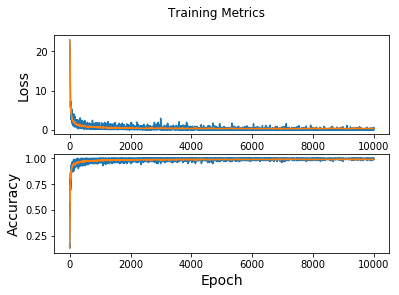

In [3]:
import matplotlib.pyplot as plt

# Affichage des tableaux qui récapitulent la variation des métriques durant l'entrainement
fig, axes = plt.subplots(2)
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)
axes[0].plot(test_loss_result)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
axes[1].plot(test_accuracy_results)
plt.show()